In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from keras import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import TensorBoard
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from itertools import permutations

In [3]:
df_train = pd.read_csv('uoft_ai_class_1/final_project/train.csv')

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# get the non-numerical columns

cols = df_train.columns
num_cols = df_train._get_numeric_data().columns
list(set(cols) - set(num_cols))

['HeatingQC',
 'Condition2',
 'BsmtExposure',
 'CentralAir',
 'PavedDrive',
 'ExterCond',
 'MiscFeature',
 'SaleType',
 'Condition1',
 'ExterQual',
 'GarageQual',
 'RoofMatl',
 'PoolQC',
 'SaleCondition',
 'Exterior1st',
 'LotConfig',
 'BsmtFinType1',
 'Electrical',
 'FireplaceQu',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Functional',
 'GarageFinish',
 'LandSlope',
 'Foundation',
 'Alley',
 'GarageType',
 'Heating',
 'BldgType',
 'MasVnrType',
 'Fence',
 'Utilities',
 'LotShape',
 'BsmtCond',
 'KitchenQual',
 'BsmtFinType2',
 'MSZoning',
 'BsmtQual',
 'Exterior2nd',
 'Street',
 'GarageCond',
 'LandContour']

Correlation between columns

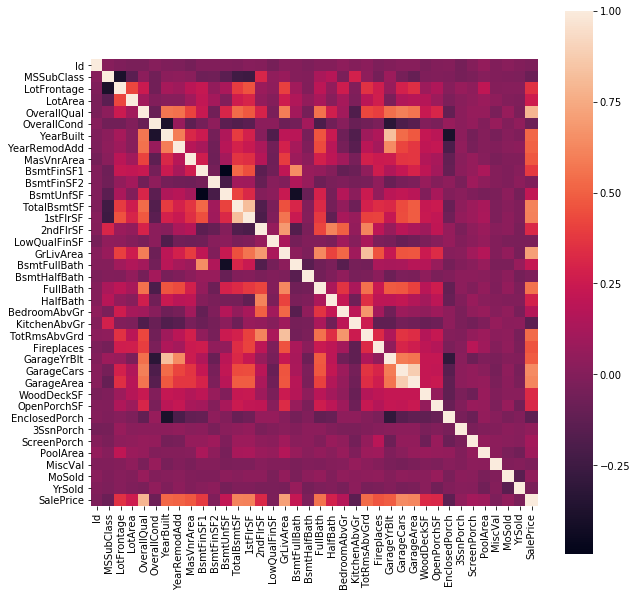

In [7]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True)

Distribution of sale prices

C:\Users\vladimir\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


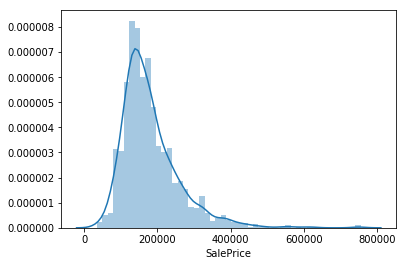

In [8]:
sns.distplot(df_train['SalePrice'])

sale price / year built chart

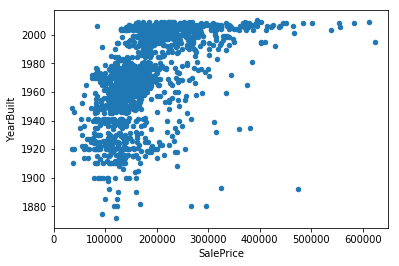

In [9]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
p = data.plot.scatter(x='SalePrice', y='YearBuilt', xlim=(0,650000))

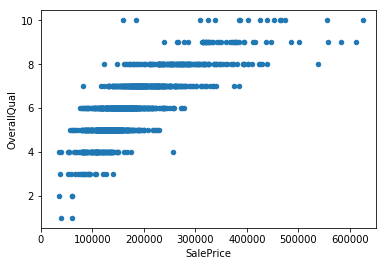

In [10]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
p = data.plot.scatter(x='SalePrice', y='OverallQual', xlim=(0,650000))

In [11]:
df_train = pd.read_csv('uoft_ai_class_1/final_project/train.csv')
df_test = pd.read_csv('uoft_ai_class_1/final_project/test.csv')

In [12]:
def prep_df(df):
    # Convert categories to one-hot-encodings
    df_train_one_hot = pd.get_dummies(df)
    
    # Scale the dataframe
    x = df_train_one_hot.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_train_one_hot_2 = pd.DataFrame(x_scaled)
    
    return df_train_one_hot_2

In [13]:
# remove outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
# maybe we should use log for the sale price?
# df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

sale_price = df_train['SalePrice']
df_train.drop(['Id', 'SalePrice'], inplace=True, axis=1)

df_train = prep_df(df_train)
df_test = prep_df(df_test)

In [15]:
train_X, val_X, train_y, val_y = train_test_split(df_train, sale_price, random_state = 42, test_size=0.2)

Simple Neural Network with TensorBoard support

In [16]:
tbCallBack = TensorBoard(log_dir='./uoft_ai_class_1/Graph', histogram_freq=0,  
          write_graph=True, write_images=True)

In [20]:
def train_model(neurons):
    print("neurons used", neurons)
    model = Sequential()

    model.add(Dense(neurons[0], activation='relu', input_dim=287))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(neurons[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1))

    optimizer = tf.train.RMSPropOptimizer(0.01)
    model.compile (loss = 'mse', optimizer = optimizer)

    hist = model.fit(train_X, train_y, epochs=1000, batch_size=32, validation_data = (val_X, val_y), callbacks=[tbCallBack])

    return hist

a = [8,16,32,64]
perms = set(permutations(a, 2))

for p in perms:
    res = train_model(p)
    history[p] = np.average([res.history['val_loss'][-1], res.history['val_loss'][-2]])


neurons used (64, 8)
Train on 1166 samples, validate on 292 samples
Epoch 1/1000
1166/1166 [==============================] - 1s 482us/step - loss: 39209727090.1681 - val_loss: 38415715285.9178
Epoch 2/1000
1166/1166 [==============================] - 0s 156us/step - loss: 39208035719.6844 - val_loss: 38416462441.2055
Epoch 3/1000
1166/1166 [==============================] - 0s 152us/step - loss: 39205292425.4408 - val_loss: 38410682255.7808
Epoch 4/1000
1166/1166 [==============================] - 0s 140us/step - loss: 39201872493.7770 - val_loss: 38408652631.6712
Epoch 5/1000
1166/1166 [==============================] - 0s 145us/step - loss: 39197534179.8971 - val_loss: 38404936128.8767
Epoch 6/1000
1166/1166 [==============================] - 0s 144us/step - loss: 39192441646.9846 - val_loss: 38402884032.8767
Epoch 7/1000
1166/1166 [==============================] - 0s 144us/step - loss: 39186605841.1252 - val_loss: 38393029589.9178
Epoch 8/1000
1166/1166 [==========================

1166/1166 [==============================] - 0s 139us/step - loss: 37583522434.8542 - val_loss: 36724763493.6986
Epoch 66/1000
1166/1166 [==============================] - 0s 139us/step - loss: 37514319843.8971 - val_loss: 36679389324.2740
Epoch 67/1000
1166/1166 [==============================] - 0s 138us/step - loss: 37476653505.6467 - val_loss: 36634060182.7945
Epoch 68/1000
1166/1166 [==============================] - 0s 139us/step - loss: 37437957406.2985 - val_loss: 36580794480.2192
Epoch 69/1000
1166/1166 [==============================] - ETA: 0s - loss: 37311710995.692 - 0s 142us/step - loss: 37359955195.1698 - val_loss: 36518482958.0274
Epoch 70/1000
1166/1166 [==============================] - 0s 214us/step - loss: 37292305409.7564 - val_loss: 36470046523.6164
Epoch 71/1000
1166/1166 [==============================] - 0s 139us/step - loss: 37221978631.9039 - val_loss: 36419414661.2603
Epoch 72/1000
1166/1166 [==============================] - 0s 140us/step - loss: 3720196446

1166/1166 [==============================] - 0s 149us/step - loss: 33094553737.0017 - val_loss: 32234445361.0959
Epoch 130/1000
1166/1166 [==============================] - 0s 147us/step - loss: 33012223283.3756 - val_loss: 32145135587.9452
Epoch 131/1000
1166/1166 [==============================] - 0s 140us/step - loss: 33030711123.8696 - val_loss: 32046351850.9589
Epoch 132/1000
1166/1166 [==============================] - 0s 141us/step - loss: 32862972504.6998 - val_loss: 31950006384.2192
Epoch 133/1000
1166/1166 [==============================] - 0s 163us/step - loss: 32718654585.1938 - val_loss: 31850183946.5205
Epoch 134/1000
1166/1166 [==============================] - 0s 146us/step - loss: 32648510184.7273 - val_loss: 31763540220.4931
Epoch 135/1000
1166/1166 [==============================] - 0s 141us/step - loss: 32547849779.8148 - val_loss: 31661061386.5205
Epoch 136/1000
1166/1166 [==============================] - 0s 145us/step - loss: 32568827496.5077 - val_loss: 31572676

1166/1166 [==============================] - 0s 163us/step - loss: 26590336354.7993 - val_loss: 25584130328.5479
Epoch 194/1000
1166/1166 [==============================] - 0s 157us/step - loss: 26676201774.1063 - val_loss: 25459515812.8219
Epoch 195/1000
1166/1166 [==============================] - 0s 145us/step - loss: 26313230139.2796 - val_loss: 25334338714.3014
Epoch 196/1000
1166/1166 [==============================] - 0s 138us/step - loss: 26535074006.2847 - val_loss: 25213652318.6849
Epoch 197/1000
1166/1166 [==============================] - 0s 138us/step - loss: 26168845795.0189 - val_loss: 25105632915.2877
Epoch 198/1000
1166/1166 [==============================] - 0s 139us/step - loss: 26245198886.6415 - val_loss: 24992971369.2055
Epoch 199/1000
1166/1166 [==============================] - 0s 142us/step - loss: 26164449097.3310 - val_loss: 24868959779.0685
Epoch 200/1000
1166/1166 [==============================] - 0s 137us/step - loss: 25738259888.0823 - val_loss: 24755163

Epoch 257/1000
1166/1166 [==============================] - 0s 140us/step - loss: 19263785293.7221 - val_loss: 17986305627.1781
Epoch 258/1000
1166/1166 [==============================] - 0s 145us/step - loss: 19291101612.5695 - val_loss: 17860913460.6027
Epoch 259/1000
1166/1166 [==============================] - 0s 139us/step - loss: 19038674272.1647 - val_loss: 17736259541.9178
Epoch 260/1000
1166/1166 [==============================] - 0s 145us/step - loss: 19362230489.7976 - val_loss: 17607607267.9452
Epoch 261/1000
1166/1166 [==============================] - 0s 141us/step - loss: 18933188106.0995 - val_loss: 17501830200.1096
Epoch 262/1000
1166/1166 [==============================] - 0s 142us/step - loss: 19147601718.0103 - val_loss: 17396335644.0548
Epoch 263/1000
1166/1166 [==============================] - 0s 139us/step - loss: 18920498868.9125 - val_loss: 17266088062.2466
Epoch 264/1000
1166/1166 [==============================] - 0s 141us/step - loss: 18689780793.9623 - val

1166/1166 [==============================] - 0s 148us/step - loss: 13691388581.9828 - val_loss: 11015345215.1233
Epoch 322/1000
1166/1166 [==============================] - 0s 145us/step - loss: 13133880613.3242 - val_loss: 10912825708.7123
Epoch 323/1000
1166/1166 [==============================] - 0s 144us/step - loss: 13033962221.9966 - val_loss: 10815235008.8767
Epoch 324/1000
1166/1166 [==============================] - 0s 138us/step - loss: 13411916229.1595 - val_loss: 10720760242.8493
Epoch 325/1000
1166/1166 [==============================] - 0s 136us/step - loss: 13697308591.2041 - val_loss: 10636419478.7945
Epoch 326/1000
1166/1166 [==============================] - 0s 135us/step - loss: 13449668734.4631 - val_loss: 10550610179.5068
Epoch 327/1000
1166/1166 [==============================] - 0s 136us/step - loss: 13175252686.3808 - val_loss: 10460912064.8767
Epoch 328/1000
1166/1166 [==============================] - 0s 141us/step - loss: 12676465258.2642 - val_loss: 10375506

1166/1166 [==============================] - 0s 144us/step - loss: 10241491209.2213 - val_loss: 6824975121.5342
Epoch 386/1000
1166/1166 [==============================] - 0s 140us/step - loss: 10210046580.8027 - val_loss: 6795685807.3425
Epoch 387/1000
1166/1166 [==============================] - 0s 139us/step - loss: 10228347597.5026 - val_loss: 6771513347.5068
Epoch 388/1000
1166/1166 [==============================] - 0s 139us/step - loss: 10645616418.6895 - val_loss: 6744217424.6575
Epoch 389/1000
1166/1166 [==============================] - 0s 139us/step - loss: 10107777733.5986 - val_loss: 6710558709.4795
Epoch 390/1000
1166/1166 [==============================] - 0s 150us/step - loss: 10901463969.1527 - val_loss: 6687456003.5068
Epoch 391/1000
1166/1166 [==============================] - 0s 144us/step - loss: 9854035755.4717 - val_loss: 6654691692.7123
Epoch 392/1000
1166/1166 [==============================] - 0s 145us/step - loss: 10687163790.7101 - val_loss: 6627797009.5342


1166/1166 [==============================] - 0s 143us/step - loss: 9473095337.4957 - val_loss: 6008338740.6027
Epoch 450/1000
1166/1166 [==============================] - 0s 145us/step - loss: 9739416979.1012 - val_loss: 6010487001.4247
Epoch 451/1000
1166/1166 [==============================] - 0s 139us/step - loss: 10110898565.9280 - val_loss: 6005306206.6849
Epoch 452/1000
1166/1166 [==============================] - 0s 139us/step - loss: 10199346727.5197 - val_loss: 6007419616.4384
Epoch 453/1000
1166/1166 [==============================] - 0s 148us/step - loss: 10182793768.3979 - val_loss: 6003006779.6164
Epoch 454/1000
1166/1166 [==============================] - 0s 144us/step - loss: 10354785447.7393 - val_loss: 6007254983.8904
Epoch 455/1000
1166/1166 [==============================] - 0s 141us/step - loss: 10243981167.9726 - val_loss: 6007856538.3014
Epoch 456/1000
1166/1166 [==============================] - 0s 138us/step - loss: 9858057338.9503 - val_loss: 6007270999.6712
Ep

Epoch 514/1000
1166/1166 [==============================] - 0s 139us/step - loss: 10058262483.2110 - val_loss: 5951262337.7534
Epoch 515/1000
1166/1166 [==============================] - 0s 162us/step - loss: 10602659544.9194 - val_loss: 5959910652.4932
Epoch 516/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10166432565.1321 - val_loss: 5961257275.6164
Epoch 517/1000
1166/1166 [==============================] - 0s 141us/step - loss: 10065808136.3431 - val_loss: 5958874953.6438
Epoch 518/1000
1166/1166 [==============================] - 0s 139us/step - loss: 10358117163.4717 - val_loss: 5958918487.6712
Epoch 519/1000
1166/1166 [==============================] - 0s 149us/step - loss: 9991720036.1166 - val_loss: 5954455117.1507
Epoch 520/1000
1166/1166 [==============================] - 0s 162us/step - loss: 10225265305.6878 - val_loss: 5953769275.6164
Epoch 521/1000
1166/1166 [==============================] - 0s 142us/step - loss: 9939094903.8765 - val_loss: 59

1166/1166 [==============================] - 0s 151us/step - loss: 10202900613.4889 - val_loss: 5968363309.5890
Epoch 579/1000
1166/1166 [==============================] - 0s 145us/step - loss: 9958044750.1612 - val_loss: 5968471180.2740
Epoch 580/1000
1166/1166 [==============================] - 0s 147us/step - loss: 10363175409.0703 - val_loss: 5967912718.0274
Epoch 581/1000
1166/1166 [==============================] - 0s 143us/step - loss: 10168657921.7564 - val_loss: 5967601814.7945
Epoch 582/1000
1166/1166 [==============================] - 0s 174us/step - loss: 9506435222.1750 - val_loss: 5964649338.7397
Epoch 583/1000
1166/1166 [==============================] - 0s 152us/step - loss: 10613230116.8851 - val_loss: 5968882098.8493
Epoch 584/1000
1166/1166 [==============================] - 0s 152us/step - loss: 9712998099.6501 - val_loss: 5966506236.4932
Epoch 585/1000
1166/1166 [==============================] - 0s 145us/step - loss: 10129632045.2281 - val_loss: 5963371316.6027
Ep

Epoch 643/1000
1166/1166 [==============================] - 0s 154us/step - loss: 10115934801.6741 - val_loss: 5938454871.6712
Epoch 644/1000
1166/1166 [==============================] - 0s 145us/step - loss: 9913981024.6038 - val_loss: 5939895513.4247
Epoch 645/1000
1166/1166 [==============================] - 0s 145us/step - loss: 10200672096.1647 - val_loss: 5939716685.1507
Epoch 646/1000
1166/1166 [==============================] - 0s 145us/step - loss: 10111750506.7033 - val_loss: 5939686010.7397
Epoch 647/1000
1166/1166 [==============================] - 0s 161us/step - loss: 9914507987.6501 - val_loss: 5937949724.0548
Epoch 648/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10401304602.3465 - val_loss: 5937646332.4932
Epoch 649/1000
1166/1166 [==============================] - 0s 156us/step - loss: 9938485087.7256 - val_loss: 5936762417.0959
Epoch 650/1000
1166/1166 [==============================] - 0s 156us/step - loss: 10695439428.5009 - val_loss: 593

1166/1166 [==============================] - 0s 161us/step - loss: 9651880851.1012 - val_loss: 5960071799.2329
Epoch 708/1000
1166/1166 [==============================] - 0s 160us/step - loss: 10758115166.4082 - val_loss: 5959391435.3973
Epoch 709/1000
1166/1166 [==============================] - 0s 160us/step - loss: 10196876114.9914 - val_loss: 5955212982.3562
Epoch 710/1000
1166/1166 [==============================] - 0s 166us/step - loss: 10729939579.8285 - val_loss: 5960053514.5205
Epoch 711/1000
1166/1166 [==============================] - 0s 158us/step - loss: 10524195264.7684 - val_loss: 5960371382.3562
Epoch 712/1000
1166/1166 [==============================] - 0s 154us/step - loss: 10450290962.0034 - val_loss: 5959215587.9452
Epoch 713/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10410012289.0978 - val_loss: 5959176584.7671
Epoch 714/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10246604567.2727 - val_loss: 5961652946.4110


Epoch 772/1000
1166/1166 [==============================] - 0s 155us/step - loss: 10061569247.0669 - val_loss: 5944524544.0000
Epoch 773/1000
1166/1166 [==============================] - 0s 158us/step - loss: 10589590678.1750 - val_loss: 5946318230.7945
Epoch 774/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10170176611.2384 - val_loss: 5949113417.6438
Epoch 775/1000
1166/1166 [==============================] - 0s 151us/step - loss: 10501939978.0995 - val_loss: 5950645037.5890
Epoch 776/1000
1166/1166 [==============================] - 0s 159us/step - loss: 10120874623.3413 - val_loss: 5949763247.3425
Epoch 777/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10135168015.8079 - val_loss: 5954088756.6027
Epoch 778/1000
1166/1166 [==============================] - 0s 159us/step - loss: 9886486996.0892 - val_loss: 5953938410.9589
Epoch 779/1000
1166/1166 [==============================] - 0s 145us/step - loss: 10297462940.3225 - val_loss: 5

1166/1166 [==============================] - 0s 191us/step - loss: 10636147210.5386 - val_loss: 5962866730.0822
Epoch 837/1000
1166/1166 [==============================] - 0s 188us/step - loss: 9317066342.7513 - val_loss: 5959168049.0959
Epoch 838/1000
1166/1166 [==============================] - 0s 179us/step - loss: 10144830442.9228 - val_loss: 5960606488.5479
Epoch 839/1000
1166/1166 [==============================] - 0s 170us/step - loss: 10280118908.7067 - val_loss: 5964157909.9178
Epoch 840/1000
1166/1166 [==============================] - 0s 169us/step - loss: 10191035207.5746 - val_loss: 5964365101.5890
Epoch 841/1000
1166/1166 [==============================] - 0s 162us/step - loss: 10395242911.3962 - val_loss: 5963113794.6301
Epoch 842/1000
1166/1166 [==============================] - 0s 162us/step - loss: 9757290251.8559 - val_loss: 5958817392.2192
Epoch 843/1000
1166/1166 [==============================] - 0s 165us/step - loss: 10078204841.0566 - val_loss: 5959603214.0274
E

Epoch 901/1000
1166/1166 [==============================] - 0s 163us/step - loss: 9587601047.9314 - val_loss: 5960331053.5890
Epoch 902/1000
1166/1166 [==============================] - 0s 154us/step - loss: 10245339212.4048 - val_loss: 5959056748.7123
Epoch 903/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10580073183.5060 - val_loss: 5962465560.5479
Epoch 904/1000
1166/1166 [==============================] - 0s 145us/step - loss: 9941824845.7221 - val_loss: 5964383505.5342
Epoch 905/1000
1166/1166 [==============================] - 0s 142us/step - loss: 10374660220.7067 - val_loss: 5965480328.7671
Epoch 906/1000
1166/1166 [==============================] - 0s 144us/step - loss: 9909071036.8165 - val_loss: 5964085633.7534
Epoch 907/1000
1166/1166 [==============================] - 0s 139us/step - loss: 9964689781.2419 - val_loss: 5963892325.6986
Epoch 908/1000
1166/1166 [==============================] - 0s 141us/step - loss: 10319888213.6261 - val_loss: 5965

1166/1166 [==============================] - 0s 140us/step - loss: 10127230855.6844 - val_loss: 5958017371.1781
Epoch 966/1000
1166/1166 [==============================] - 0s 137us/step - loss: 10014870912.6587 - val_loss: 5957662407.8904
Epoch 967/1000
1166/1166 [==============================] - 0s 144us/step - loss: 9994136801.7015 - val_loss: 5956843407.7808
Epoch 968/1000
1166/1166 [==============================] - 0s 141us/step - loss: 10043992766.5729 - val_loss: 5955888243.7260
Epoch 969/1000
1166/1166 [==============================] - 0s 139us/step - loss: 9982431664.6312 - val_loss: 5955806590.2466
Epoch 970/1000
1166/1166 [==============================] - 0s 139us/step - loss: 9968536797.3105 - val_loss: 5958838159.7808
Epoch 971/1000
1166/1166 [==============================] - 0s 141us/step - loss: 9957919074.7993 - val_loss: 5955939552.4384
Epoch 972/1000
1166/1166 [==============================] - 0s 144us/step - loss: 10728164729.6329 - val_loss: 5956492589.5890
Epo

1166/1166 [==============================] - 0s 142us/step - loss: 36593151409.8388 - val_loss: 35717363403.3973
Epoch 30/1000
1166/1166 [==============================] - 0s 139us/step - loss: 36421178717.5300 - val_loss: 35518483554.1918
Epoch 31/1000
1166/1166 [==============================] - 0s 139us/step - loss: 36267598020.7204 - val_loss: 35330956302.0274
Epoch 32/1000
1166/1166 [==============================] - 0s 140us/step - loss: 36079487228.9262 - val_loss: 35182727925.4795
Epoch 33/1000
1166/1166 [==============================] - 0s 139us/step - loss: 35868701093.5437 - val_loss: 34999454537.6438
Epoch 34/1000
1166/1166 [==============================] - 0s 139us/step - loss: 35680470917.0497 - val_loss: 34784016468.1644
Epoch 35/1000
1166/1166 [==============================] - 0s 139us/step - loss: 35446518269.3654 - val_loss: 34557254193.0959
Epoch 36/1000
1166/1166 [==============================] - 0s 139us/step - loss: 35242519304.3431 - val_loss: 34348616942.465

1166/1166 [==============================] - 0s 141us/step - loss: 18158948871.9039 - val_loss: 17028122062.9041
Epoch 94/1000
1166/1166 [==============================] - 0s 140us/step - loss: 17828085082.0172 - val_loss: 16701665251.9452
Epoch 95/1000
1166/1166 [==============================] - 0s 137us/step - loss: 17537744931.1286 - val_loss: 16365447658.9589
Epoch 96/1000
1166/1166 [==============================] - 0s 139us/step - loss: 17110603797.0772 - val_loss: 16028937230.0274
Epoch 97/1000
1166/1166 [==============================] - 0s 139us/step - loss: 16887677163.3619 - val_loss: 15718920795.1781
Epoch 98/1000
1166/1166 [==============================] - 0s 139us/step - loss: 16549666187.1973 - val_loss: 15410521466.7397
Epoch 99/1000
1166/1166 [==============================] - 0s 137us/step - loss: 16231567029.7907 - val_loss: 15106758010.7397
Epoch 100/1000
1166/1166 [==============================] - 0s 139us/step - loss: 16024058892.2950 - val_loss: 14790220224.87

Epoch 158/1000
1166/1166 [==============================] - 0s 162us/step - loss: 7063247805.2556 - val_loss: 5569574459.6164
Epoch 159/1000
1166/1166 [==============================] - 0s 165us/step - loss: 6915884789.0223 - val_loss: 5563336023.6712
Epoch 160/1000
1166/1166 [==============================] - 0s 168us/step - loss: 6990782871.0532 - val_loss: 5563068219.6164
Epoch 161/1000
1166/1166 [==============================] - 0s 156us/step - loss: 6924176012.5146 - val_loss: 5558655340.7123
Epoch 162/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7165687569.1252 - val_loss: 5554425526.3562
Epoch 163/1000
1166/1166 [==============================] - 0s 139us/step - loss: 6941499095.1630 - val_loss: 5549573719.6712
Epoch 164/1000
1166/1166 [==============================] - 0s 143us/step - loss: 6923673120.4940 - val_loss: 5547737564.9315
Epoch 165/1000
1166/1166 [==============================] - 0s 143us/step - loss: 6932689757.5300 - val_loss: 55475266

1166/1166 [==============================] - 0s 142us/step - loss: 6999286235.9931 - val_loss: 5537618561.7534
Epoch 224/1000
1166/1166 [==============================] - 0s 142us/step - loss: 6820430649.9623 - val_loss: 5536770335.5616
Epoch 225/1000
1166/1166 [==============================] - 0s 137us/step - loss: 7008743192.1509 - val_loss: 5537571538.4110
Epoch 226/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7257419437.0086 - val_loss: 5537172003.0685
Epoch 227/1000
1166/1166 [==============================] - 0s 137us/step - loss: 6811027721.2213 - val_loss: 5535710576.2192
Epoch 228/1000
1166/1166 [==============================] - 0s 140us/step - loss: 6876607700.7479 - val_loss: 5535928909.1507
Epoch 229/1000
1166/1166 [==============================] - 0s 141us/step - loss: 7042271498.5386 - val_loss: 5535655809.7534
Epoch 230/1000
1166/1166 [==============================] - 0s 141us/step - loss: 6919080640.3293 - val_loss: 5534483796.1644
Epoch 2

1166/1166 [==============================] - 0s 140us/step - loss: 7082501372.9262 - val_loss: 5534599641.4247
Epoch 289/1000
1166/1166 [==============================] - 0s 141us/step - loss: 7009515008.0000 - val_loss: 5534687442.4110
Epoch 290/1000
1166/1166 [==============================] - 0s 137us/step - loss: 6882993701.7633 - val_loss: 5534249692.9315
Epoch 291/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7048720650.5386 - val_loss: 5536116974.4658
Epoch 292/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7089302758.0926 - val_loss: 5536172817.5342
Epoch 293/1000
1166/1166 [==============================] - 0s 167us/step - loss: 6937940848.8508 - val_loss: 5536121442.1918
Epoch 294/1000
1166/1166 [==============================] - 0s 151us/step - loss: 6960221826.4151 - val_loss: 5535154105.8630
Epoch 295/1000
1166/1166 [==============================] - 0s 137us/step - loss: 7133144923.7736 - val_loss: 5535015266.1918
Epoch 2

1166/1166 [==============================] - 0s 145us/step - loss: 6947541874.6072 - val_loss: 5534914907.1781
Epoch 354/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6910863701.1870 - val_loss: 5535566483.2877
Epoch 355/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6956748864.7684 - val_loss: 5534989648.6575
Epoch 356/1000
1166/1166 [==============================] - 0s 147us/step - loss: 6874451742.2985 - val_loss: 5534480896.0000
Epoch 357/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6847558753.9211 - val_loss: 5533356547.5068
Epoch 358/1000
1166/1166 [==============================] - 0s 147us/step - loss: 7013882079.0669 - val_loss: 5533360976.6575
Epoch 359/1000
1166/1166 [==============================] - 0s 143us/step - loss: 6983348176.5763 - val_loss: 5534616835.5068
Epoch 360/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7132680385.2075 - val_loss: 5534522915.0685
Epoch 3

1166/1166 [==============================] - 0s 140us/step - loss: 6831266808.9743 - val_loss: 5534970090.9589
Epoch 419/1000
1166/1166 [==============================] - 0s 144us/step - loss: 6891921753.1389 - val_loss: 5534812766.6849
Epoch 420/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7144753858.0858 - val_loss: 5535559918.4658
Epoch 421/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7033728189.6947 - val_loss: 5536197463.6712
Epoch 422/1000
1166/1166 [==============================] - 0s 163us/step - loss: 6932463949.7221 - val_loss: 5535806639.3425
Epoch 423/1000
1166/1166 [==============================] - 0s 142us/step - loss: 7107805389.5026 - val_loss: 5536080959.1233
Epoch 424/1000
1166/1166 [==============================] - 0s 141us/step - loss: 6991437713.3448 - val_loss: 5535774779.6164
Epoch 425/1000
1166/1166 [==============================] - 0s 146us/step - loss: 6986809491.5403 - val_loss: 5535901422.4658
Epoch 4

1166/1166 [==============================] - 0s 193us/step - loss: 6765041767.6295 - val_loss: 5535572750.0274
Epoch 484/1000
1166/1166 [==============================] - 0s 172us/step - loss: 7068381162.9228 - val_loss: 5535512540.9315
Epoch 485/1000
1166/1166 [==============================] - 0s 181us/step - loss: 6941546618.9503 - val_loss: 5534987902.2466
Epoch 486/1000
1166/1166 [==============================] - 0s 168us/step - loss: 7098724692.7479 - val_loss: 5534887760.6575
Epoch 487/1000
1166/1166 [==============================] - 0s 159us/step - loss: 7171673524.0343 - val_loss: 5534994102.3562
Epoch 488/1000
1166/1166 [==============================] - 0s 168us/step - loss: 6877624917.1870 - val_loss: 5534398239.5616
Epoch 489/1000
1166/1166 [==============================] - 0s 162us/step - loss: 7060340844.0206 - val_loss: 5533882746.7397
Epoch 490/1000
1166/1166 [==============================] - 0s 161us/step - loss: 7080869229.3379 - val_loss: 5534321369.4247
Epoch 4

1166/1166 [==============================] - 0s 146us/step - loss: 6971111096.4254 - val_loss: 5537573895.0137
Epoch 549/1000
1166/1166 [==============================] - 0s 167us/step - loss: 6993498287.6432 - val_loss: 5536851729.5342
Epoch 550/1000
1166/1166 [==============================] - 0s 170us/step - loss: 6988019452.9262 - val_loss: 5536893552.2192
Epoch 551/1000
1166/1166 [==============================] - 0s 164us/step - loss: 7033811941.8731 - val_loss: 5536253264.6575
Epoch 552/1000
1166/1166 [==============================] - 0s 164us/step - loss: 6810543500.0755 - val_loss: 5536108656.2192
Epoch 553/1000
1166/1166 [==============================] - 0s 163us/step - loss: 6968006540.0755 - val_loss: 5535398554.3014
Epoch 554/1000
1166/1166 [==============================] - 0s 144us/step - loss: 6884511229.3654 - val_loss: 5535729215.1233
Epoch 555/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7110993740.8439 - val_loss: 5535903074.1918
Epoch 5

1166/1166 [==============================] - 0s 145us/step - loss: 7014438269.1458 - val_loss: 5535680638.2466
Epoch 614/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7283553882.4563 - val_loss: 5536562193.5342
Epoch 615/1000
1166/1166 [==============================] - 0s 138us/step - loss: 7056528557.0086 - val_loss: 5537338452.1644
Epoch 616/1000
1166/1166 [==============================] - 0s 140us/step - loss: 6860479182.3808 - val_loss: 5537483835.6164
Epoch 617/1000
1166/1166 [==============================] - 0s 138us/step - loss: 7016470169.6878 - val_loss: 5537797519.7808
Epoch 618/1000
1166/1166 [==============================] - 0s 142us/step - loss: 7035545317.2144 - val_loss: 5537145936.6575
Epoch 619/1000
1166/1166 [==============================] - 0s 146us/step - loss: 7096532712.7273 - val_loss: 5536166750.6849
Epoch 620/1000
1166/1166 [==============================] - 0s 138us/step - loss: 7029194718.1887 - val_loss: 5536993118.6849
Epoch 6

1166/1166 [==============================] - 0s 173us/step - loss: 7054356994.6346 - val_loss: 5535030440.3288
Epoch 679/1000
1166/1166 [==============================] - 0s 174us/step - loss: 6995742907.9383 - val_loss: 5534765255.8904
Epoch 680/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7073912854.8336 - val_loss: 5534929572.8219
Epoch 681/1000
1166/1166 [==============================] - 0s 168us/step - loss: 7042751596.8988 - val_loss: 5534346106.7397
Epoch 682/1000
1166/1166 [==============================] - 0s 167us/step - loss: 7030509181.1458 - val_loss: 5534330101.4795
Epoch 683/1000
1166/1166 [==============================] - 0s 172us/step - loss: 6900780236.1852 - val_loss: 5533912954.7397
Epoch 684/1000
1166/1166 [==============================] - 0s 168us/step - loss: 6891931517.3654 - val_loss: 5533751815.0137
Epoch 685/1000
1166/1166 [==============================] - 0s 166us/step - loss: 7058479085.9966 - val_loss: 5534061589.0411
Epoch 6

1166/1166 [==============================] - 0s 169us/step - loss: 7102058509.1732 - val_loss: 5538498637.1507
Epoch 744/1000
1166/1166 [==============================] - 0s 157us/step - loss: 6975474885.8182 - val_loss: 5538629407.5616
Epoch 745/1000
1166/1166 [==============================] - 0s 153us/step - loss: 6957090761.1115 - val_loss: 5537254000.2192
Epoch 746/1000
1166/1166 [==============================] - 0s 172us/step - loss: 7096662243.8971 - val_loss: 5536403322.7397
Epoch 747/1000
1166/1166 [==============================] - 0s 165us/step - loss: 6812993781.0223 - val_loss: 5537052661.4795
Epoch 748/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7014381979.4443 - val_loss: 5536665810.4110
Epoch 749/1000
1166/1166 [==============================] - 0s 167us/step - loss: 7015694046.1887 - val_loss: 5536795690.0822
Epoch 750/1000
1166/1166 [==============================] - 0s 167us/step - loss: 6986123750.5317 - val_loss: 5536359406.4658
Epoch 7

1166/1166 [==============================] - 0s 152us/step - loss: 6974997020.9811 - val_loss: 5535048307.7260
Epoch 809/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7123241975.4374 - val_loss: 5535917711.7808
Epoch 810/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6934580707.0189 - val_loss: 5535802648.5479
Epoch 811/1000
1166/1166 [==============================] - 0s 136us/step - loss: 6980096312.6449 - val_loss: 5535015269.6986
Epoch 812/1000
1166/1166 [==============================] - 0s 158us/step - loss: 7011034700.4048 - val_loss: 5535760170.0822
Epoch 813/1000
1166/1166 [==============================] - 0s 154us/step - loss: 6858878027.3070 - val_loss: 5535521031.0137
Epoch 814/1000
1166/1166 [==============================] - 0s 158us/step - loss: 7027364789.3516 - val_loss: 5535636599.2329
Epoch 815/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7075356587.6913 - val_loss: 5534886336.8767
Epoch 8

1166/1166 [==============================] - 0s 163us/step - loss: 6997642701.9417 - val_loss: 5537760887.2329
Epoch 874/1000
1166/1166 [==============================] - 0s 141us/step - loss: 6899933595.8834 - val_loss: 5536903757.1507
Epoch 875/1000
1166/1166 [==============================] - 0s 165us/step - loss: 7153725007.0395 - val_loss: 5537521881.4247
Epoch 876/1000
1166/1166 [==============================] - 0s 158us/step - loss: 7000389158.6415 - val_loss: 5537686650.7397
Epoch 877/1000
1166/1166 [==============================] - 0s 162us/step - loss: 6874684761.1389 - val_loss: 5538708059.1781
Epoch 878/1000
1166/1166 [==============================] - 0s 163us/step - loss: 7118192142.4906 - val_loss: 5538988915.7260
Epoch 879/1000
1166/1166 [==============================] - 0s 141us/step - loss: 7062312216.5901 - val_loss: 5538454980.3836
Epoch 880/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7092962377.7702 - val_loss: 5537400186.7397
Epoch 8

1166/1166 [==============================] - 0s 194us/step - loss: 7169119124.8576 - val_loss: 5535608116.6027
Epoch 939/1000
1166/1166 [==============================] - 0s 174us/step - loss: 6866013541.4340 - val_loss: 5535455575.6712
Epoch 940/1000
1166/1166 [==============================] - 0s 187us/step - loss: 6733003703.1081 - val_loss: 5535014677.0411
Epoch 941/1000
1166/1166 [==============================] - 0s 180us/step - loss: 6848810662.8611 - val_loss: 5534307531.3973
Epoch 942/1000
1166/1166 [==============================] - 0s 186us/step - loss: 6986345028.9400 - val_loss: 5534621047.2329
Epoch 943/1000
1166/1166 [==============================] - 0s 185us/step - loss: 6872314693.3791 - val_loss: 5534322866.8493
Epoch 944/1000
1166/1166 [==============================] - 0s 171us/step - loss: 7006152286.8473 - val_loss: 5534944796.0548
Epoch 945/1000
1166/1166 [==============================] - 0s 183us/step - loss: 7190131285.1870 - val_loss: 5535850587.1781
Epoch 9

1166/1166 [==============================] - 0s 154us/step - loss: 39203300894.7376 - val_loss: 38407250340.8219
Epoch 3/1000
1166/1166 [==============================] - 0s 140us/step - loss: 39194512280.3705 - val_loss: 38396301676.7123
Epoch 4/1000
1166/1166 [==============================] - 0s 156us/step - loss: 39182320553.9348 - val_loss: 38382238874.3014
Epoch 5/1000
1166/1166 [==============================] - 0s 167us/step - loss: 39166838306.2504 - val_loss: 38368339939.9452
Epoch 6/1000
1166/1166 [==============================] - 0s 140us/step - loss: 39148111879.0257 - val_loss: 38343886006.3562
Epoch 7/1000
1166/1166 [==============================] - 0s 157us/step - loss: 39126770816.2196 - val_loss: 38320538890.5205
Epoch 8/1000
1166/1166 [==============================] - 0s 152us/step - loss: 39102013489.1801 - val_loss: 38296103416.9863
Epoch 9/1000
1166/1166 [==============================] - 0s 147us/step - loss: 39074274045.8045 - val_loss: 38269572166.1370
Epoch

1166/1166 [==============================] - 0s 169us/step - loss: 32806729924.7204 - val_loss: 31884267688.3288
Epoch 67/1000
1166/1166 [==============================] - 0s 172us/step - loss: 32567603948.2401 - val_loss: 31689918744.5479
Epoch 68/1000
1166/1166 [==============================] - 0s 165us/step - loss: 32499637644.9537 - val_loss: 31517132828.0548
Epoch 69/1000
1166/1166 [==============================] - 0s 169us/step - loss: 32258436557.9417 - val_loss: 31301234856.3288
Epoch 70/1000
1166/1166 [==============================] - 0s 172us/step - loss: 32090701342.7376 - val_loss: 31111629304.9863
Epoch 71/1000
1166/1166 [==============================] - 0s 163us/step - loss: 31822672307.5952 - val_loss: 30920696200.7671
Epoch 72/1000
1166/1166 [==============================] - 0s 163us/step - loss: 31624066376.4528 - val_loss: 30747782354.4110
Epoch 73/1000
1166/1166 [==============================] - 0s 163us/step - loss: 31493958492.6518 - val_loss: 30541332199.452

1166/1166 [==============================] - 0s 150us/step - loss: 18598817721.7427 - val_loss: 17534465304.5479
Epoch 131/1000
1166/1166 [==============================] - 0s 158us/step - loss: 18408117077.6261 - val_loss: 17291058610.8493
Epoch 132/1000
1166/1166 [==============================] - 0s 165us/step - loss: 18064081018.9503 - val_loss: 17041815860.6027
Epoch 133/1000
1166/1166 [==============================] - 0s 157us/step - loss: 17917447022.2161 - val_loss: 16836904202.5205
Epoch 134/1000
1166/1166 [==============================] - 0s 151us/step - loss: 17780877975.9314 - val_loss: 16585290317.1507
Epoch 135/1000
1166/1166 [==============================] - 0s 145us/step - loss: 17483610356.1441 - val_loss: 16329156832.4384
Epoch 136/1000
1166/1166 [==============================] - 0s 148us/step - loss: 17307472195.1835 - val_loss: 16106294257.9726
Epoch 137/1000
1166/1166 [==============================] - 0s 148us/step - loss: 17020547827.2659 - val_loss: 15895192

1166/1166 [==============================] - 0s 139us/step - loss: 8205468259.2384 - val_loss: 6393251762.8493
Epoch 195/1000
1166/1166 [==============================] - 0s 139us/step - loss: 8127129942.2847 - val_loss: 6326272701.3699
Epoch 196/1000
1166/1166 [==============================] - 0s 139us/step - loss: 8011554983.7393 - val_loss: 6265834327.6712
Epoch 197/1000
1166/1166 [==============================] - 0s 141us/step - loss: 7873638408.7822 - val_loss: 6207766310.5753
Epoch 198/1000
1166/1166 [==============================] - 0s 141us/step - loss: 7917671518.4082 - val_loss: 6143165411.9452
Epoch 199/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7888270699.5815 - val_loss: 6088732152.9863
Epoch 200/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7986296477.2007 - val_loss: 6041440652.2740
Epoch 201/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7861842949.2693 - val_loss: 6000767561.6438
Epoch 2

Epoch 259/1000
1166/1166 [==============================] - 0s 163us/step - loss: 7561064822.9983 - val_loss: 5569749419.8356
Epoch 260/1000
1166/1166 [==============================] - 0s 167us/step - loss: 7412971054.5455 - val_loss: 5567807326.6849
Epoch 261/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7728986347.3619 - val_loss: 5568308697.4247
Epoch 262/1000
1166/1166 [==============================] - 0s 159us/step - loss: 7388722513.2350 - val_loss: 5568466018.1918
Epoch 263/1000
1166/1166 [==============================] - 0s 146us/step - loss: 7683515483.3345 - val_loss: 5569948002.1918
Epoch 264/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7247843989.2967 - val_loss: 5567923389.3699
Epoch 265/1000
1166/1166 [==============================] - 0s 146us/step - loss: 7550073007.2041 - val_loss: 5567935018.0822
Epoch 266/1000
1166/1166 [==============================] - 0s 143us/step - loss: 7724515929.5780 - val_loss: 55669612

1166/1166 [==============================] - 0s 143us/step - loss: 7383164854.2298 - val_loss: 5563369885.8082
Epoch 325/1000
1166/1166 [==============================] - 0s 165us/step - loss: 7631359485.3654 - val_loss: 5563324580.8219
Epoch 326/1000
1166/1166 [==============================] - 0s 179us/step - loss: 7488767072.6038 - val_loss: 5563327726.4658
Epoch 327/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7506628002.4700 - val_loss: 5563033368.5479
Epoch 328/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7380520926.6278 - val_loss: 5562262079.1233
Epoch 329/1000
1166/1166 [==============================] - 0s 146us/step - loss: 7972665229.8319 - val_loss: 5562578291.7260
Epoch 330/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7619177855.7804 - val_loss: 5563191169.7534
Epoch 331/1000
1166/1166 [==============================] - 0s 143us/step - loss: 7538558503.5197 - val_loss: 5563233609.6438
Epoch 3

1166/1166 [==============================] - 0s 174us/step - loss: 7682156125.9691 - val_loss: 5564815507.2877
Epoch 390/1000
1166/1166 [==============================] - 0s 166us/step - loss: 7676154391.7118 - val_loss: 5563942957.5890
Epoch 391/1000
1166/1166 [==============================] - 0s 174us/step - loss: 7452767493.2693 - val_loss: 5564071441.5342
Epoch 392/1000
1166/1166 [==============================] - 0s 170us/step - loss: 7691130339.8971 - val_loss: 5564528268.2740
Epoch 393/1000
1166/1166 [==============================] - 0s 178us/step - loss: 7584738915.6775 - val_loss: 5565828962.1918
Epoch 394/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7354786126.6003 - val_loss: 5565530518.7945
Epoch 395/1000
1166/1166 [==============================] - 0s 172us/step - loss: 7509762960.4666 - val_loss: 5564032497.9726
Epoch 396/1000
1166/1166 [==============================] - 0s 175us/step - loss: 7584836575.5060 - val_loss: 5562728952.9863
Epoch 3

1166/1166 [==============================] - 0s 147us/step - loss: 7340991497.6604 - val_loss: 5559159429.2603
Epoch 455/1000
1166/1166 [==============================] - 0s 148us/step - loss: 7691499757.9966 - val_loss: 5559527122.4110
Epoch 456/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7762600652.6244 - val_loss: 5561159746.6301
Epoch 457/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7467042665.3859 - val_loss: 5562306763.3973
Epoch 458/1000
1166/1166 [==============================] - 0s 142us/step - loss: 7530812215.7667 - val_loss: 5562344419.9452
Epoch 459/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7203519103.3413 - val_loss: 5561471600.2192
Epoch 460/1000
1166/1166 [==============================] - 0s 140us/step - loss: 7484746850.7993 - val_loss: 5560219009.7534
Epoch 461/1000
1166/1166 [==============================] - 0s 140us/step - loss: 7415124535.3276 - val_loss: 5560816562.8493
Epoch 4

Epoch 519/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7677835540.6381 - val_loss: 5562291680.4384
Epoch 520/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7364353468.3774 - val_loss: 5561417454.4658
Epoch 521/1000
1166/1166 [==============================] - 0s 142us/step - loss: 7718390088.4528 - val_loss: 5561470141.3699
Epoch 522/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7520013311.1218 - val_loss: 5562124207.3425
Epoch 523/1000
1166/1166 [==============================] - 0s 141us/step - loss: 7668264585.8799 - val_loss: 5562940973.5890
Epoch 524/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7575162760.5626 - val_loss: 5563726392.1096
Epoch 525/1000
1166/1166 [==============================] - 0s 141us/step - loss: 7493523060.8027 - val_loss: 5564167876.3836
Epoch 526/1000
1166/1166 [==============================] - 0s 140us/step - loss: 7682866908.4322 - val_loss: 55656822

1166/1166 [==============================] - 0s 379us/step - loss: 7440194670.6552 - val_loss: 5566118319.3425
Epoch 585/1000
1166/1166 [==============================] - 0s 344us/step - loss: 7701578766.0515 - val_loss: 5566990939.1781
Epoch 586/1000
1166/1166 [==============================] - 0s 331us/step - loss: 7623948445.2007 - val_loss: 5567871351.2329
Epoch 587/1000
1166/1166 [==============================] - 0s 299us/step - loss: 7177968388.8302 - val_loss: 5567708587.8356
Epoch 588/1000
1166/1166 [==============================] - 0s 312us/step - loss: 7650052731.8285 - val_loss: 5567913612.2740
Epoch 589/1000
1166/1166 [==============================] - 0s 286us/step - loss: 7597386003.7599 - val_loss: 5567304213.0411
Epoch 590/1000
1166/1166 [==============================] - 0s 344us/step - loss: 7605968018.2230 - val_loss: 5567367672.9863
Epoch 591/1000
1166/1166 [==============================] - 0s 305us/step - loss: 7573319041.9760 - val_loss: 5567822160.6575
Epoch 5

1166/1166 [==============================] - 0s 187us/step - loss: 7346034749.4751 - val_loss: 5560290700.2740
Epoch 650/1000
1166/1166 [==============================] - 0s 182us/step - loss: 7482049715.1561 - val_loss: 5559712564.6027
Epoch 651/1000
1166/1166 [==============================] - 0s 198us/step - loss: 7579830525.3654 - val_loss: 5559832698.7397
Epoch 652/1000
1166/1166 [==============================] - 0s 182us/step - loss: 7671027544.2607 - val_loss: 5561071777.3151
Epoch 653/1000
1166/1166 [==============================] - 0s 174us/step - loss: 7413347289.3585 - val_loss: 5560720692.6027
Epoch 654/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7577460943.2590 - val_loss: 5560364130.1918
Epoch 655/1000
1166/1166 [==============================] - 0s 164us/step - loss: 7366505311.2864 - val_loss: 5559231943.8904
Epoch 656/1000
1166/1166 [==============================] - 0s 165us/step - loss: 7551417669.8182 - val_loss: 5560001146.7397
Epoch 6

1166/1166 [==============================] - 0s 163us/step - loss: 7514526201.8525 - val_loss: 5564716316.0548
Epoch 715/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7309206841.5232 - val_loss: 5563765612.7123
Epoch 716/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7799351703.4923 - val_loss: 5563143441.5342
Epoch 717/1000
1166/1166 [==============================] - 0s 158us/step - loss: 7428875899.8285 - val_loss: 5563823451.1781
Epoch 718/1000
1166/1166 [==============================] - 0s 152us/step - loss: 7435707540.8576 - val_loss: 5563848269.1507
Epoch 719/1000
1166/1166 [==============================] - 0s 149us/step - loss: 7851073667.2933 - val_loss: 5565218703.7808
Epoch 720/1000
1166/1166 [==============================] - 0s 162us/step - loss: 7618388173.0635 - val_loss: 5563906994.8493
Epoch 721/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7655761844.4734 - val_loss: 5566372541.3699
Epoch 7

1166/1166 [==============================] - 0s 149us/step - loss: 7612475572.0343 - val_loss: 5563438146.6301
Epoch 780/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7488614970.4014 - val_loss: 5565280929.3151
Epoch 781/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7507849695.5060 - val_loss: 5566305427.2877
Epoch 782/1000
1166/1166 [==============================] - 0s 138us/step - loss: 7466755423.2864 - val_loss: 5567728415.5616
Epoch 783/1000
1166/1166 [==============================] - 0s 143us/step - loss: 7602032792.8096 - val_loss: 5569974398.2466
Epoch 784/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7640330166.2298 - val_loss: 5568134115.9452
Epoch 785/1000
1166/1166 [==============================] - 0s 137us/step - loss: 7439864358.6415 - val_loss: 5567516279.2329
Epoch 786/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7482664800.1647 - val_loss: 5566976298.0822
Epoch 7

Epoch 844/1000
1166/1166 [==============================] - 0s 153us/step - loss: 7585542012.7067 - val_loss: 5564177891.9452
Epoch 845/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7560635058.2779 - val_loss: 5564453340.9315
Epoch 846/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7597863231.6707 - val_loss: 5564819399.8904
Epoch 847/1000
1166/1166 [==============================] - 0s 153us/step - loss: 7585833316.9949 - val_loss: 5564766674.4110
Epoch 848/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7406033906.8268 - val_loss: 5564681251.0685
Epoch 849/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7651812945.6741 - val_loss: 5565503312.6575
Epoch 850/1000
1166/1166 [==============================] - 0s 148us/step - loss: 7435871989.4614 - val_loss: 5565348681.6438
Epoch 851/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7422944588.4048 - val_loss: 55657073

Epoch 909/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7424560022.6141 - val_loss: 5561540194.1918
Epoch 910/1000
1166/1166 [==============================] - 0s 141us/step - loss: 7414531270.9160 - val_loss: 5561296163.0685
Epoch 911/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7505603482.1269 - val_loss: 5560722126.9041
Epoch 912/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7548033478.9160 - val_loss: 5561368993.3151
Epoch 913/1000
1166/1166 [==============================] - 0s 152us/step - loss: 7485206622.8473 - val_loss: 5561494692.8219
Epoch 914/1000
1166/1166 [==============================] - 0s 142us/step - loss: 7451923311.0943 - val_loss: 5561594971.1781
Epoch 915/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7403358523.7187 - val_loss: 5563638419.2877
Epoch 916/1000
1166/1166 [==============================] - 0s 143us/step - loss: 7506801455.8628 - val_loss: 55630845

Epoch 974/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7482274837.5163 - val_loss: 5563584662.7945
Epoch 975/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7339676596.9125 - val_loss: 5563249379.9452
Epoch 976/1000
1166/1166 [==============================] - 0s 140us/step - loss: 7643969994.8679 - val_loss: 5561477141.0411
Epoch 977/1000
1166/1166 [==============================] - 0s 142us/step - loss: 7482232549.2144 - val_loss: 5560986322.4110
Epoch 978/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7573547894.1201 - val_loss: 5561979532.2740
Epoch 979/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7456430507.2521 - val_loss: 5561496155.1781
Epoch 980/1000
1166/1166 [==============================] - 0s 154us/step - loss: 7484423599.2041 - val_loss: 5559986133.9178
Epoch 981/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7426618994.1681 - val_loss: 55595733

1166/1166 [==============================] - 0s 147us/step - loss: 38619881436.8714 - val_loss: 37816834160.2192
Epoch 39/1000
1166/1166 [==============================] - 0s 142us/step - loss: 38589416101.9828 - val_loss: 37786826723.9452
Epoch 40/1000
1166/1166 [==============================] - 0s 138us/step - loss: 38571841901.3379 - val_loss: 37755915783.0137
Epoch 41/1000
1166/1166 [==============================] - 0s 140us/step - loss: 38524819768.6449 - val_loss: 37722789298.8493
Epoch 42/1000
1166/1166 [==============================] - 0s 162us/step - loss: 38502617688.6998 - val_loss: 37688855958.7945
Epoch 43/1000
1166/1166 [==============================] - 0s 146us/step - loss: 38465410906.8954 - val_loss: 37649261834.5205
Epoch 44/1000
1166/1166 [==============================] - 0s 142us/step - loss: 38424089145.0841 - val_loss: 37617055098.7397
Epoch 45/1000
1166/1166 [==============================] - 0s 141us/step - loss: 38384157711.8079 - val_loss: 37584260615.013

1166/1166 [==============================] - 0s 329us/step - loss: 35292737820.5420 - val_loss: 34428396137.2055
Epoch 103/1000
1166/1166 [==============================] - 0s 304us/step - loss: 35159052070.2024 - val_loss: 34354829255.8904
Epoch 104/1000
1166/1166 [==============================] - 0s 352us/step - loss: 35204113947.2247 - val_loss: 34277700201.2055
Epoch 105/1000
1166/1166 [==============================] - 0s 325us/step - loss: 35100591267.3482 - val_loss: 34210797455.7808
Epoch 106/1000
1166/1166 [==============================] - 0s 274us/step - loss: 34943786874.5111 - val_loss: 34121513184.4384
Epoch 107/1000
1166/1166 [==============================] - 0s 253us/step - loss: 34925729669.0497 - val_loss: 34046903057.5342
Epoch 108/1000
1166/1166 [==============================] - 0s 270us/step - loss: 34858247085.4477 - val_loss: 33967247247.7808
Epoch 109/1000
1166/1166 [==============================] - 0s 266us/step - loss: 34780207736.3156 - val_loss: 33891551

1166/1166 [==============================] - 0s 184us/step - loss: 29432512847.4786 - val_loss: 28564419541.9178
Epoch 167/1000
1166/1166 [==============================] - 0s 175us/step - loss: 29236162549.4614 - val_loss: 28465936860.9315
Epoch 168/1000
1166/1166 [==============================] - 0s 171us/step - loss: 29396491314.9365 - val_loss: 28361280301.5890
Epoch 169/1000
1166/1166 [==============================] - 0s 195us/step - loss: 29356354400.1647 - val_loss: 28245482538.0822
Epoch 170/1000
1166/1166 [==============================] - 0s 196us/step - loss: 28951025161.6604 - val_loss: 28123733342.6849
Epoch 171/1000
1166/1166 [==============================] - 0s 198us/step - loss: 29027389239.7667 - val_loss: 28018042234.7397
Epoch 172/1000
1166/1166 [==============================] - 0s 203us/step - loss: 28754788945.6741 - val_loss: 27905888508.4931
Epoch 173/1000
1166/1166 [==============================] - 0s 175us/step - loss: 28755038980.8302 - val_loss: 27800041

1166/1166 [==============================] - 0s 162us/step - loss: 22429838457.1938 - val_loss: 21182510823.4521
Epoch 231/1000
1166/1166 [==============================] - 0s 146us/step - loss: 22325818447.0395 - val_loss: 21066402114.6301
Epoch 232/1000
1166/1166 [==============================] - 0s 152us/step - loss: 22364520451.5129 - val_loss: 20945280504.9863
Epoch 233/1000
1166/1166 [==============================] - 0s 150us/step - loss: 21823198866.6621 - val_loss: 20827648182.3562
Epoch 234/1000
1166/1166 [==============================] - 0s 144us/step - loss: 21875836727.7667 - val_loss: 20693609023.1233
Epoch 235/1000
1166/1166 [==============================] - 0s 143us/step - loss: 22000898578.4425 - val_loss: 20586222311.4521
Epoch 236/1000
1166/1166 [==============================] - 0s 147us/step - loss: 21863377556.4185 - val_loss: 20450659973.2603
Epoch 237/1000
1166/1166 [==============================] - 0s 155us/step - loss: 21875729866.4288 - val_loss: 20340831

Epoch 294/1000
1166/1166 [==============================] - 0s 143us/step - loss: 15959014177.8113 - val_loss: 13710756022.3562
Epoch 295/1000
1166/1166 [==============================] - 0s 140us/step - loss: 15420566889.8250 - val_loss: 13610903972.8219
Epoch 296/1000
1166/1166 [==============================] - 0s 139us/step - loss: 15175316052.3088 - val_loss: 13507525702.1370
Epoch 297/1000
1166/1166 [==============================] - 0s 144us/step - loss: 15124376193.0978 - val_loss: 13390763358.6849
Epoch 298/1000
1166/1166 [==============================] - 0s 150us/step - loss: 15064796751.9177 - val_loss: 13288820469.4795
Epoch 299/1000
1166/1166 [==============================] - 0s 146us/step - loss: 15163234880.1098 - val_loss: 13181231651.0685
Epoch 300/1000
1166/1166 [==============================] - 0s 142us/step - loss: 15731376412.5420 - val_loss: 13085575841.3151
Epoch 301/1000
1166/1166 [==============================] - 0s 145us/step - loss: 14963003982.1612 - val

1166/1166 [==============================] - 0s 163us/step - loss: 11405676185.6878 - val_loss: 8086690612.6027
Epoch 359/1000
1166/1166 [==============================] - 0s 157us/step - loss: 11204450246.0377 - val_loss: 8020953116.0548
Epoch 360/1000
1166/1166 [==============================] - 0s 151us/step - loss: 10951419274.3190 - val_loss: 7956461098.0822
Epoch 361/1000
1166/1166 [==============================] - 0s 152us/step - loss: 10899836238.6003 - val_loss: 7905687264.4384
Epoch 362/1000
1166/1166 [==============================] - 0s 149us/step - loss: 10755901798.3122 - val_loss: 7840755361.3151
Epoch 363/1000
1166/1166 [==============================] - 0s 150us/step - loss: 11066739816.5077 - val_loss: 7795505201.0959
Epoch 364/1000
1166/1166 [==============================] - 0s 147us/step - loss: 10626373274.5660 - val_loss: 7737441700.8219
Epoch 365/1000
1166/1166 [==============================] - 0s 144us/step - loss: 10673651589.0497 - val_loss: 7685217237.9178

1166/1166 [==============================] - 0s 158us/step - loss: 10079800390.2573 - val_loss: 6152273818.3014
Epoch 423/1000
1166/1166 [==============================] - 0s 166us/step - loss: 10191101482.1544 - val_loss: 6147425013.4795
Epoch 424/1000
1166/1166 [==============================] - 0s 157us/step - loss: 9929112047.3139 - val_loss: 6134570986.9589
Epoch 425/1000
1166/1166 [==============================] - 0s 149us/step - loss: 10242863053.9417 - val_loss: 6123828714.9589
Epoch 426/1000
1166/1166 [==============================] - 0s 146us/step - loss: 9980007829.7358 - val_loss: 6114360123.6164
Epoch 427/1000
1166/1166 [==============================] - 0s 147us/step - loss: 10254975358.9022 - val_loss: 6117042596.8219
Epoch 428/1000
1166/1166 [==============================] - 0s 159us/step - loss: 10086579537.2350 - val_loss: 6121739828.6027
Epoch 429/1000
1166/1166 [==============================] - 0s 152us/step - loss: 10135555200.2196 - val_loss: 6112967978.0822
E

1166/1166 [==============================] - 0s 144us/step - loss: 9752549832.6724 - val_loss: 5971550246.5753
Epoch 487/1000
1166/1166 [==============================] - 0s 142us/step - loss: 9924127215.3139 - val_loss: 5968385627.1781
Epoch 488/1000
1166/1166 [==============================] - 0s 139us/step - loss: 10318196121.2487 - val_loss: 5970798816.4384
Epoch 489/1000
1166/1166 [==============================] - 0s 142us/step - loss: 9835272365.8868 - val_loss: 5971552925.8082
Epoch 490/1000
1166/1166 [==============================] - 0s 139us/step - loss: 10472330204.8714 - val_loss: 5966804031.1233
Epoch 491/1000
1166/1166 [==============================] - 0s 143us/step - loss: 10264962987.6913 - val_loss: 5967805071.7808
Epoch 492/1000
1166/1166 [==============================] - 0s 141us/step - loss: 9908848583.7942 - val_loss: 5969317390.0274
Epoch 493/1000
1166/1166 [==============================] - 0s 144us/step - loss: 10364590630.6415 - val_loss: 5969360026.3014
Epo

Epoch 551/1000
1166/1166 [==============================] - 0s 166us/step - loss: 10276672529.5643 - val_loss: 5944352778.5205
Epoch 552/1000
1166/1166 [==============================] - 0s 163us/step - loss: 10282162681.8525 - val_loss: 5942833376.4384
Epoch 553/1000
1166/1166 [==============================] - 0s 163us/step - loss: 10170220324.4460 - val_loss: 5942955590.1370
Epoch 554/1000
1166/1166 [==============================] - 0s 179us/step - loss: 9839693639.5746 - val_loss: 5938284302.0274
Epoch 555/1000
1166/1166 [==============================] - 0s 195us/step - loss: 10050753746.7719 - val_loss: 5935958121.2055
Epoch 556/1000
1166/1166 [==============================] - 0s 168us/step - loss: 10362795406.7101 - val_loss: 5940267397.2603
Epoch 557/1000
1166/1166 [==============================] - 0s 165us/step - loss: 9981625603.0738 - val_loss: 5937933838.0274
Epoch 558/1000
1166/1166 [==============================] - 0s 169us/step - loss: 10226631790.6552 - val_loss: 59

1166/1166 [==============================] - 0s 147us/step - loss: 9878233607.9039 - val_loss: 5927433899.8356
Epoch 616/1000
1166/1166 [==============================] - 0s 144us/step - loss: 9801832065.0978 - val_loss: 5930249345.7534
Epoch 617/1000
1166/1166 [==============================] - 0s 143us/step - loss: 10144860439.2727 - val_loss: 5934322140.9315
Epoch 618/1000
1166/1166 [==============================] - 0s 139us/step - loss: 9649238513.0703 - val_loss: 5932510186.9589
Epoch 619/1000
1166/1166 [==============================] - 0s 139us/step - loss: 10129135567.6981 - val_loss: 5932177748.1644
Epoch 620/1000
1166/1166 [==============================] - 0s 142us/step - loss: 9705268353.9760 - val_loss: 5930113045.0411
Epoch 621/1000
1166/1166 [==============================] - 0s 141us/step - loss: 9849196267.3619 - val_loss: 5930478883.0685
Epoch 622/1000
1166/1166 [==============================] - 0s 141us/step - loss: 10298888316.7067 - val_loss: 5934552078.0274
Epoc

1166/1166 [==============================] - 0s 152us/step - loss: 10247835905.3173 - val_loss: 5945308387.9452
Epoch 680/1000
1166/1166 [==============================] - 0s 142us/step - loss: 10224872793.1389 - val_loss: 5942487993.8630
Epoch 681/1000
1166/1166 [==============================] - 0s 145us/step - loss: 10447437017.7976 - val_loss: 5942375928.9863
Epoch 682/1000
1166/1166 [==============================] - 0s 156us/step - loss: 10384447306.2093 - val_loss: 5943612107.3973
Epoch 683/1000
1166/1166 [==============================] - 0s 161us/step - loss: 10129718623.2864 - val_loss: 5940847886.0274
Epoch 684/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10464033812.1990 - val_loss: 5944677351.4521
Epoch 685/1000
1166/1166 [==============================] - 0s 152us/step - loss: 10114618336.3842 - val_loss: 5948125990.5753
Epoch 686/1000
1166/1166 [==============================] - 0s 154us/step - loss: 10451105630.4082 - val_loss: 5949455843.9452

1166/1166 [==============================] - 0s 153us/step - loss: 10111089219.6226 - val_loss: 5962714848.4384
Epoch 744/1000
1166/1166 [==============================] - 0s 146us/step - loss: 9065161510.2024 - val_loss: 5960224490.9589
Epoch 745/1000
1166/1166 [==============================] - 0s 143us/step - loss: 10467058229.5712 - val_loss: 5961282237.3699
Epoch 746/1000
1166/1166 [==============================] - 0s 143us/step - loss: 9932919571.7599 - val_loss: 5958111228.4932
Epoch 747/1000
1166/1166 [==============================] - 0s 142us/step - loss: 10075051525.2693 - val_loss: 5957909034.0822
Epoch 748/1000
1166/1166 [==============================] - 0s 142us/step - loss: 10066575658.5935 - val_loss: 5960451121.0959
Epoch 749/1000
1166/1166 [==============================] - 0s 155us/step - loss: 10549023127.4923 - val_loss: 5957410703.7808
Epoch 750/1000
1166/1166 [==============================] - 0s 152us/step - loss: 10285165430.1201 - val_loss: 5962464403.2877
E

Epoch 808/1000
1166/1166 [==============================] - 0s 146us/step - loss: 9974843147.8559 - val_loss: 5959440012.2740
Epoch 809/1000
1166/1166 [==============================] - 0s 140us/step - loss: 10238555736.6998 - val_loss: 5958701189.2603
Epoch 810/1000
1166/1166 [==============================] - 0s 158us/step - loss: 10252898137.1389 - val_loss: 5959601916.4932
Epoch 811/1000
1166/1166 [==============================] - 0s 148us/step - loss: 10933669267.9794 - val_loss: 5960277377.7534
Epoch 812/1000
1166/1166 [==============================] - 0s 143us/step - loss: 10059252656.9605 - val_loss: 5960268870.1370
Epoch 813/1000
1166/1166 [==============================] - 0s 144us/step - loss: 9958192678.6415 - val_loss: 5962199815.0137
Epoch 814/1000
1166/1166 [==============================] - 0s 143us/step - loss: 10551853705.8799 - val_loss: 5962112890.7397
Epoch 815/1000
1166/1166 [==============================] - 0s 142us/step - loss: 9808477923.4580 - val_loss: 596

1166/1166 [==============================] - 0s 170us/step - loss: 9987756295.4648 - val_loss: 5947565399.6712
Epoch 873/1000
1166/1166 [==============================] - 0s 158us/step - loss: 9770731495.4100 - val_loss: 5946952630.3562
Epoch 874/1000
1166/1166 [==============================] - 0s 169us/step - loss: 10107561218.1955 - val_loss: 5948779558.5753
Epoch 875/1000
1166/1166 [==============================] - 0s 181us/step - loss: 10441362414.4357 - val_loss: 5950832145.5342
Epoch 876/1000
1166/1166 [==============================] - 0s 166us/step - loss: 10079202425.6329 - val_loss: 5951818415.3425
Epoch 877/1000
1166/1166 [==============================] - 0s 154us/step - loss: 10566353793.5369 - val_loss: 5956516678.1370
Epoch 878/1000
1166/1166 [==============================] - 0s 155us/step - loss: 9888417637.4340 - val_loss: 5952125327.7808
Epoch 879/1000
1166/1166 [==============================] - 0s 157us/step - loss: 9879754263.7118 - val_loss: 5949263500.2740
Epo

Epoch 937/1000
1166/1166 [==============================] - 0s 147us/step - loss: 10136059743.2864 - val_loss: 5953533930.9589
Epoch 938/1000
1166/1166 [==============================] - 0s 175us/step - loss: 9818341703.5746 - val_loss: 5952879254.7945
Epoch 939/1000
1166/1166 [==============================] - 0s 156us/step - loss: 9447138969.6878 - val_loss: 5952937573.6986
Epoch 940/1000
1166/1166 [==============================] - 0s 170us/step - loss: 10882924728.8645 - val_loss: 5955107889.0959
Epoch 941/1000
1166/1166 [==============================] - 0s 169us/step - loss: 10696428356.9400 - val_loss: 5956193693.8082
Epoch 942/1000
1166/1166 [==============================] - 0s 145us/step - loss: 9217259312.7410 - val_loss: 5953215435.3973
Epoch 943/1000
1166/1166 [==============================] - 0s 165us/step - loss: 10245047626.2093 - val_loss: 5956226998.3562
Epoch 944/1000
1166/1166 [==============================] - 0s 162us/step - loss: 10177557394.2230 - val_loss: 595

Train on 1166 samples, validate on 292 samples
Epoch 1/1000
1166/1166 [==============================] - 1s 576us/step - loss: 39208807436.2950 - val_loss: 38415781888.0000
Epoch 2/1000
1166/1166 [==============================] - 0s 197us/step - loss: 39202991959.3825 - val_loss: 38408097315.0685
Epoch 3/1000
1166/1166 [==============================] - 0s 214us/step - loss: 39193824401.7839 - val_loss: 38397093803.8356
Epoch 4/1000
1166/1166 [==============================] - 0s 221us/step - loss: 39181343011.5677 - val_loss: 38381553074.8493
Epoch 5/1000
1166/1166 [==============================] - 0s 232us/step - loss: 39166024965.7084 - val_loss: 38366844928.0000
Epoch 6/1000
1166/1166 [==============================] - 0s 221us/step - loss: 39146962227.3756 - val_loss: 38348449427.2877
Epoch 7/1000
1166/1166 [==============================] - 0s 224us/step - loss: 39124496275.1012 - val_loss: 38321946371.5069
Epoch 8/1000
1166/1166 [==============================] - 0s 234us/step

1166/1166 [==============================] - 0s 201us/step - loss: 32994503737.9623 - val_loss: 32067391516.0548
Epoch 66/1000
1166/1166 [==============================] - 0s 176us/step - loss: 32798382410.2093 - val_loss: 31879483055.3425
Epoch 67/1000
1166/1166 [==============================] - 0s 168us/step - loss: 32589239547.1698 - val_loss: 31696865925.2603
Epoch 68/1000
1166/1166 [==============================] - 0s 163us/step - loss: 32384034383.9177 - val_loss: 31502499615.5616
Epoch 69/1000
1166/1166 [==============================] - 0s 168us/step - loss: 32241730084.0069 - val_loss: 31322806468.3836
Epoch 70/1000
1166/1166 [==============================] - 0s 177us/step - loss: 32114531986.6621 - val_loss: 31133387172.8219
Epoch 71/1000
1166/1166 [==============================] - 0s 163us/step - loss: 31817311349.6810 - val_loss: 30935848735.5616
Epoch 72/1000
1166/1166 [==============================] - 0s 162us/step - loss: 31663546979.2384 - val_loss: 30701432972.274

1166/1166 [==============================] - 0s 165us/step - loss: 18802636540.0480 - val_loss: 17656677376.0000
Epoch 130/1000
1166/1166 [==============================] - 0s 157us/step - loss: 18619682984.6175 - val_loss: 17434011816.3288
Epoch 131/1000
1166/1166 [==============================] - 0s 157us/step - loss: 18405866685.6947 - val_loss: 17192942690.1918
Epoch 132/1000
1166/1166 [==============================] - 0s 157us/step - loss: 18209529276.3774 - val_loss: 16966316943.7808
Epoch 133/1000
1166/1166 [==============================] - 0s 158us/step - loss: 18092167956.6381 - val_loss: 16732333378.6301
Epoch 134/1000
1166/1166 [==============================] - 0s 197us/step - loss: 17701165349.3242 - val_loss: 16511149280.4384
Epoch 135/1000
1166/1166 [==============================] - 0s 156us/step - loss: 17596410857.1664 - val_loss: 16262279111.8904
Epoch 136/1000
1166/1166 [==============================] - 0s 163us/step - loss: 17203149323.4168 - val_loss: 16029051

1166/1166 [==============================] - 0s 146us/step - loss: 8263208716.2950 - val_loss: 6437442139.1781
Epoch 194/1000
1166/1166 [==============================] - 0s 142us/step - loss: 8150156565.5163 - val_loss: 6366484518.5753
Epoch 195/1000
1166/1166 [==============================] - 0s 141us/step - loss: 8011792232.9468 - val_loss: 6302410008.5479
Epoch 196/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7769830746.8954 - val_loss: 6244741288.3288
Epoch 197/1000
1166/1166 [==============================] - 0s 154us/step - loss: 7963818183.7942 - val_loss: 6181695635.2877
Epoch 198/1000
1166/1166 [==============================] - 0s 147us/step - loss: 7956940377.5780 - val_loss: 6120543147.8356
Epoch 199/1000
1166/1166 [==============================] - 0s 146us/step - loss: 7809656083.3208 - val_loss: 6070374435.0685
Epoch 200/1000
1166/1166 [==============================] - 0s 160us/step - loss: 7964936058.5111 - val_loss: 6023291062.3562
Epoch 2

1166/1166 [==============================] - 0s 153us/step - loss: 7446067086.2710 - val_loss: 5565405334.7945
Epoch 259/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7587989290.5935 - val_loss: 5566090801.0959
Epoch 260/1000
1166/1166 [==============================] - 0s 163us/step - loss: 7541722141.8593 - val_loss: 5564890613.4795
Epoch 261/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7382879171.4031 - val_loss: 5565047667.7260
Epoch 262/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7549097597.5849 - val_loss: 5565125568.8767
Epoch 263/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7464783668.2539 - val_loss: 5566510956.7123
Epoch 264/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7449408851.4305 - val_loss: 5565996558.0274
Epoch 265/1000
1166/1166 [==============================] - 0s 192us/step - loss: 7352457586.6072 - val_loss: 5567030478.9041
Epoch 2

1166/1166 [==============================] - 0s 166us/step - loss: 7564948528.3019 - val_loss: 5562565032.3288
Epoch 324/1000
1166/1166 [==============================] - 0s 171us/step - loss: 7118070119.1904 - val_loss: 5561849582.4658
Epoch 325/1000
1166/1166 [==============================] - 0s 175us/step - loss: 7545978611.2659 - val_loss: 5561403707.6164
Epoch 326/1000
1166/1166 [==============================] - 0s 155us/step - loss: 7346469337.7976 - val_loss: 5560743971.0685
Epoch 327/1000
1166/1166 [==============================] - 0s 176us/step - loss: 7410052916.2539 - val_loss: 5561818718.6849
Epoch 328/1000
1166/1166 [==============================] - 0s 168us/step - loss: 7578052623.8079 - val_loss: 5561319914.9589
Epoch 329/1000
1166/1166 [==============================] - 0s 168us/step - loss: 7381975679.3413 - val_loss: 5560469760.0000
Epoch 330/1000
1166/1166 [==============================] - 0s 156us/step - loss: 7146785212.8165 - val_loss: 5559092925.3699
Epoch 3

Epoch 388/1000
1166/1166 [==============================] - 0s 179us/step - loss: 7503697219.1835 - val_loss: 5561175096.1096
Epoch 389/1000
1166/1166 [==============================] - 0s 166us/step - loss: 7424125939.7050 - val_loss: 5559813397.0411
Epoch 390/1000
1166/1166 [==============================] - 0s 175us/step - loss: 7741612837.3242 - val_loss: 5560341076.1644
Epoch 391/1000
1166/1166 [==============================] - 0s 186us/step - loss: 7507276606.3533 - val_loss: 5561936510.2466
Epoch 392/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7477825903.0943 - val_loss: 5560325407.5616
Epoch 393/1000
1166/1166 [==============================] - 0s 168us/step - loss: 7433367845.7633 - val_loss: 5559954056.7671
Epoch 394/1000
1166/1166 [==============================] - 0s 173us/step - loss: 7526764761.7976 - val_loss: 5558570962.4110
Epoch 395/1000
1166/1166 [==============================] - 0s 170us/step - loss: 7490570282.1544 - val_loss: 55591068

1166/1166 [==============================] - 0s 179us/step - loss: 7496690298.0720 - val_loss: 5563693326.0274
Epoch 454/1000
1166/1166 [==============================] - 0s 170us/step - loss: 7668343439.1492 - val_loss: 5563790104.5479
Epoch 455/1000
1166/1166 [==============================] - 0s 154us/step - loss: 7712029891.8422 - val_loss: 5564613603.9452
Epoch 456/1000
1166/1166 [==============================] - 0s 146us/step - loss: 7157523168.8233 - val_loss: 5561745302.7945
Epoch 457/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7420512155.0051 - val_loss: 5562154496.0000
Epoch 458/1000
1166/1166 [==============================] - 0s 162us/step - loss: 7562679081.7153 - val_loss: 5560128981.9178
Epoch 459/1000
1166/1166 [==============================] - 0s 170us/step - loss: 7395098216.5077 - val_loss: 5561201930.5205
Epoch 460/1000
1166/1166 [==============================] - 0s 167us/step - loss: 7642021830.0377 - val_loss: 5562649144.1096
Epoch 4

1166/1166 [==============================] - 0s 173us/step - loss: 7470046937.7976 - val_loss: 5559763228.0548
Epoch 519/1000
1166/1166 [==============================] - 0s 167us/step - loss: 7664340501.9554 - val_loss: 5559386382.0274
Epoch 520/1000
1166/1166 [==============================] - 0s 171us/step - loss: 7397758961.0703 - val_loss: 5560451580.4932
Epoch 521/1000
1166/1166 [==============================] - 0s 168us/step - loss: 7860510382.7650 - val_loss: 5561939354.3014
Epoch 522/1000
1166/1166 [==============================] - 0s 173us/step - loss: 7621812982.3396 - val_loss: 5560884550.1370
Epoch 523/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7414327518.1887 - val_loss: 5561932182.7945
Epoch 524/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7473045735.8491 - val_loss: 5562034211.0685
Epoch 525/1000
1166/1166 [==============================] - 0s 149us/step - loss: 7492490934.6690 - val_loss: 5561966332.4932
Epoch 5

1166/1166 [==============================] - 0s 157us/step - loss: 7440084357.0497 - val_loss: 5562065772.7123
Epoch 584/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7402832865.2624 - val_loss: 5563038495.5616
Epoch 585/1000
1166/1166 [==============================] - 0s 148us/step - loss: 7293952405.7358 - val_loss: 5560444689.5342
Epoch 586/1000
1166/1166 [==============================] - 0s 150us/step - loss: 7680410700.4048 - val_loss: 5559843910.1370
Epoch 587/1000
1166/1166 [==============================] - 0s 172us/step - loss: 7434210652.2127 - val_loss: 5561131541.0411
Epoch 588/1000
1166/1166 [==============================] - 0s 166us/step - loss: 7254693612.2401 - val_loss: 5561444408.1096
Epoch 589/1000
1166/1166 [==============================] - 0s 162us/step - loss: 7713250998.6690 - val_loss: 5563114047.1233
Epoch 590/1000
1166/1166 [==============================] - 0s 172us/step - loss: 7136441388.3499 - val_loss: 5561798705.0959
Epoch 5

1166/1166 [==============================] - 0s 170us/step - loss: 7833643311.8628 - val_loss: 5559400342.7945
Epoch 649/1000
1166/1166 [==============================] - 0s 171us/step - loss: 7703448793.3585 - val_loss: 5560680146.4110
Epoch 650/1000
1166/1166 [==============================] - 0s 160us/step - loss: 7751616598.0652 - val_loss: 5562206015.1233
Epoch 651/1000
1166/1166 [==============================] - 0s 158us/step - loss: 7774578600.1784 - val_loss: 5561622994.4110
Epoch 652/1000
1166/1166 [==============================] - 0s 165us/step - loss: 7271851339.9657 - val_loss: 5560468101.2603
Epoch 653/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7541149071.5883 - val_loss: 5561280070.1370
Epoch 654/1000
1166/1166 [==============================] - 0s 167us/step - loss: 7638543992.7547 - val_loss: 5562554774.7945
Epoch 655/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7519540898.0309 - val_loss: 5563785440.4384
Epoch 6

1166/1166 [==============================] - 0s 223us/step - loss: 7800874685.2556 - val_loss: 5564124622.9041
Epoch 714/1000
1166/1166 [==============================] - 0s 235us/step - loss: 7353425533.5849 - val_loss: 5564084294.1370
Epoch 715/1000
1166/1166 [==============================] - 0s 206us/step - loss: 7711715187.4854 - val_loss: 5564105538.6301
Epoch 716/1000
1166/1166 [==============================] - 0s 211us/step - loss: 7506797901.7221 - val_loss: 5564205448.7671
Epoch 717/1000
1166/1166 [==============================] - 0s 207us/step - loss: 7255136194.0858 - val_loss: 5562794103.2329
Epoch 718/1000
1166/1166 [==============================] - 0s 205us/step - loss: 7261452138.2642 - val_loss: 5563124357.2603
Epoch 719/1000
1166/1166 [==============================] - 0s 200us/step - loss: 7506479415.7667 - val_loss: 5561487668.6027
Epoch 720/1000
1166/1166 [==============================] - 0s 192us/step - loss: 7340886905.1938 - val_loss: 5561192476.0548
Epoch 7

1166/1166 [==============================] - 0s 166us/step - loss: 7466037153.1527 - val_loss: 5564481066.0822
Epoch 779/1000
1166/1166 [==============================] - 0s 188us/step - loss: 7621000119.9863 - val_loss: 5564880426.0822
Epoch 780/1000
1166/1166 [==============================] - 0s 163us/step - loss: 7369170459.2247 - val_loss: 5564781210.3014
Epoch 781/1000
1166/1166 [==============================] - 0s 163us/step - loss: 7432081638.9708 - val_loss: 5565198805.9178
Epoch 782/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7690762042.4014 - val_loss: 5566295043.5068
Epoch 783/1000
1166/1166 [==============================] - 0s 163us/step - loss: 7485654277.7084 - val_loss: 5564021875.7260
Epoch 784/1000
1166/1166 [==============================] - 0s 171us/step - loss: 7691527659.8010 - val_loss: 5564749838.0274
Epoch 785/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7438777633.8113 - val_loss: 5562320987.1781
Epoch 7

1166/1166 [==============================] - 0s 155us/step - loss: 7536326512.8508 - val_loss: 5562541161.2055
Epoch 844/1000
1166/1166 [==============================] - 0s 164us/step - loss: 7393353397.3516 - val_loss: 5562813489.0959
Epoch 845/1000
1166/1166 [==============================] - 0s 154us/step - loss: 7600658503.1355 - val_loss: 5562541739.8356
Epoch 846/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7278647268.7753 - val_loss: 5560926867.2877
Epoch 847/1000
1166/1166 [==============================] - 0s 161us/step - loss: 7303330316.7341 - val_loss: 5559855370.5205
Epoch 848/1000
1166/1166 [==============================] - 0s 175us/step - loss: 7749652692.0892 - val_loss: 5562045296.2192
Epoch 849/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7836779975.7942 - val_loss: 5564540437.0411
Epoch 850/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7472183195.0051 - val_loss: 5565853191.0137
Epoch 8

1166/1166 [==============================] - 0s 157us/step - loss: 7282907901.8045 - val_loss: 5558365892.3836
Epoch 909/1000
1166/1166 [==============================] - 0s 150us/step - loss: 7364391800.7547 - val_loss: 5559329749.9178
Epoch 910/1000
1166/1166 [==============================] - 0s 154us/step - loss: 7479655894.7238 - val_loss: 5559631612.4932
Epoch 911/1000
1166/1166 [==============================] - 0s 153us/step - loss: 7341735392.3842 - val_loss: 5558436611.5068
Epoch 912/1000
1166/1166 [==============================] - 0s 149us/step - loss: 7436501064.8919 - val_loss: 5557270415.7808
Epoch 913/1000
1166/1166 [==============================] - 0s 147us/step - loss: 7415358312.9468 - val_loss: 5558399821.1507
Epoch 914/1000
1166/1166 [==============================] - 0s 150us/step - loss: 7216878358.3945 - val_loss: 5558654954.9589
Epoch 915/1000
1166/1166 [==============================] - 0s 146us/step - loss: 7589360751.0943 - val_loss: 5560079433.6438
Epoch 9

1166/1166 [==============================] - 0s 159us/step - loss: 7634160571.4991 - val_loss: 5567795529.6438
Epoch 974/1000
1166/1166 [==============================] - 0s 155us/step - loss: 7347755884.0206 - val_loss: 5567828760.5479
Epoch 975/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7463119090.3877 - val_loss: 5566528350.6849
Epoch 976/1000
1166/1166 [==============================] - 0s 179us/step - loss: 7732291896.6449 - val_loss: 5566764712.3288
Epoch 977/1000
1166/1166 [==============================] - 0s 183us/step - loss: 7430732475.9383 - val_loss: 5564678136.9863
Epoch 978/1000
1166/1166 [==============================] - 0s 181us/step - loss: 7552942473.4408 - val_loss: 5563766384.2192
Epoch 979/1000
1166/1166 [==============================] - 0s 179us/step - loss: 7450295627.0875 - val_loss: 5564114228.6027
Epoch 980/1000
1166/1166 [==============================] - 0s 183us/step - loss: 7521247051.9657 - val_loss: 5564374601.6438
Epoch 9

1166/1166 [==============================] - 0s 405us/step - loss: 35048733353.4957 - val_loss: 34077733677.5890
Epoch 38/1000
1166/1166 [==============================] - 0s 283us/step - loss: 34798974968.9743 - val_loss: 33861309790.6849
Epoch 39/1000
1166/1166 [==============================] - 0s 190us/step - loss: 34601158339.8422 - val_loss: 33641600322.6301
Epoch 40/1000
1166/1166 [==============================] - 0s 160us/step - loss: 34373274014.5180 - val_loss: 33367461747.7260
Epoch 41/1000
1166/1166 [==============================] - 0s 158us/step - loss: 34133730154.7033 - val_loss: 33148869169.0959
Epoch 42/1000
1166/1166 [==============================] - 0s 157us/step - loss: 33876837265.3448 - val_loss: 32919899458.6301
Epoch 43/1000
1166/1166 [==============================] - 0s 156us/step - loss: 33686507621.8731 - val_loss: 32689945614.0274
Epoch 44/1000
1166/1166 [==============================] - 0s 153us/step - loss: 33414970548.9125 - val_loss: 32389421476.821

1166/1166 [==============================] - 0s 156us/step - loss: 15618649397.1321 - val_loss: 14305879923.7260
Epoch 102/1000
1166/1166 [==============================] - 0s 154us/step - loss: 15283346570.7581 - val_loss: 13982547168.4384
Epoch 103/1000
1166/1166 [==============================] - 0s 158us/step - loss: 14783509695.4511 - val_loss: 13681215221.4795
Epoch 104/1000
1166/1166 [==============================] - 0s 154us/step - loss: 14701280285.8593 - val_loss: 13384790408.7671
Epoch 105/1000
1166/1166 [==============================] - 0s 154us/step - loss: 14346369087.2316 - val_loss: 13062342389.4795
Epoch 106/1000
1166/1166 [==============================] - 0s 153us/step - loss: 14130380348.5969 - val_loss: 12771067805.8082
Epoch 107/1000
1166/1166 [==============================] - 0s 157us/step - loss: 13741112293.6535 - val_loss: 12450380526.4658
Epoch 108/1000
1166/1166 [==============================] - 0s 158us/step - loss: 13488059513.1938 - val_loss: 12151303

1166/1166 [==============================] - 0s 153us/step - loss: 7064559993.1938 - val_loss: 5545666679.2329
Epoch 166/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7008021561.9623 - val_loss: 5546114784.4384
Epoch 167/1000
1166/1166 [==============================] - 0s 146us/step - loss: 6968851982.4906 - val_loss: 5542564636.0548
Epoch 168/1000
1166/1166 [==============================] - 0s 144us/step - loss: 6937444674.3053 - val_loss: 5541115826.8493
Epoch 169/1000
1166/1166 [==============================] - 0s 152us/step - loss: 6861369561.7976 - val_loss: 5540040069.2603
Epoch 170/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7013807897.9074 - val_loss: 5541728119.2329
Epoch 171/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6996416100.9949 - val_loss: 5541936604.9315
Epoch 172/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6966488040.2882 - val_loss: 5541914375.0137
Epoch 1

1166/1166 [==============================] - 0s 163us/step - loss: 7043826139.1149 - val_loss: 5534518699.8356
Epoch 230/1000
1166/1166 [==============================] - 0s 185us/step - loss: 6909077169.3997 - val_loss: 5533252530.8493
Epoch 231/1000
1166/1166 [==============================] - 0s 195us/step - loss: 6908501534.7376 - val_loss: 5532947764.6027
Epoch 232/1000
1166/1166 [==============================] - 0s 212us/step - loss: 6859286012.0480 - val_loss: 5534143060.1644
Epoch 233/1000
1166/1166 [==============================] - 0s 222us/step - loss: 6943623110.9160 - val_loss: 5533969225.6438
Epoch 234/1000
1166/1166 [==============================] - 0s 228us/step - loss: 7073351591.3002 - val_loss: 5536362885.2603
Epoch 235/1000
1166/1166 [==============================] - 0s 224us/step - loss: 6861958673.5643 - val_loss: 5535589824.8767
Epoch 236/1000
1166/1166 [==============================] - 0s 216us/step - loss: 7039838477.6124 - val_loss: 5535947022.0274
Epoch 2

1166/1166 [==============================] - 0s 169us/step - loss: 7190900729.4134 - val_loss: 5537133441.7534
Epoch 295/1000
1166/1166 [==============================] - 0s 168us/step - loss: 6869177031.7942 - val_loss: 5536708138.0822
Epoch 296/1000
1166/1166 [==============================] - 0s 163us/step - loss: 7197788263.8491 - val_loss: 5537334699.8356
Epoch 297/1000
1166/1166 [==============================] - 0s 163us/step - loss: 7122088474.7856 - val_loss: 5536523677.8082
Epoch 298/1000
1166/1166 [==============================] - 0s 170us/step - loss: 7076617621.7358 - val_loss: 5536205220.8219
Epoch 299/1000
1166/1166 [==============================] - 0s 166us/step - loss: 7020605163.3619 - val_loss: 5535206392.9863
Epoch 300/1000
1166/1166 [==============================] - 0s 166us/step - loss: 7005867302.2024 - val_loss: 5535100198.5753
Epoch 301/1000
1166/1166 [==============================] - 0s 170us/step - loss: 7161975810.6346 - val_loss: 5535733205.9178
Epoch 3

Epoch 359/1000
1166/1166 [==============================] - 0s 159us/step - loss: 7008817538.4151 - val_loss: 5536458029.5890
Epoch 360/1000
1166/1166 [==============================] - 0s 156us/step - loss: 7002061822.6827 - val_loss: 5536580169.6438
Epoch 361/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7141172062.4082 - val_loss: 5537155464.7671
Epoch 362/1000
1166/1166 [==============================] - 0s 162us/step - loss: 7040744072.1235 - val_loss: 5537352265.6438
Epoch 363/1000
1166/1166 [==============================] - 0s 156us/step - loss: 7072482424.7547 - val_loss: 5537936755.7260
Epoch 364/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7132365162.7033 - val_loss: 5538289635.9452
Epoch 365/1000
1166/1166 [==============================] - 0s 148us/step - loss: 7117754360.0961 - val_loss: 5538433855.1233
Epoch 366/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6916226293.9005 - val_loss: 55387653

1166/1166 [==============================] - 0s 146us/step - loss: 6866298688.5489 - val_loss: 5535925135.7808
Epoch 425/1000
1166/1166 [==============================] - 0s 148us/step - loss: 7107260692.6381 - val_loss: 5534784231.4521
Epoch 426/1000
1166/1166 [==============================] - 0s 142us/step - loss: 6939514660.4460 - val_loss: 5534160685.5890
Epoch 427/1000
1166/1166 [==============================] - 0s 140us/step - loss: 7105743997.1458 - val_loss: 5534489726.2466
Epoch 428/1000
1166/1166 [==============================] - 0s 157us/step - loss: 6908354180.1715 - val_loss: 5534453107.7260
Epoch 429/1000
1166/1166 [==============================] - 0s 146us/step - loss: 6919219759.4237 - val_loss: 5534106182.1370
Epoch 430/1000
1166/1166 [==============================] - 0s 142us/step - loss: 7064941557.4614 - val_loss: 5533391949.1507
Epoch 431/1000
1166/1166 [==============================] - 0s 141us/step - loss: 7041264294.8611 - val_loss: 5532841002.0822
Epoch 4

1166/1166 [==============================] - 0s 141us/step - loss: 7078540029.1458 - val_loss: 5536044905.2055
Epoch 490/1000
1166/1166 [==============================] - 0s 146us/step - loss: 7037856104.9468 - val_loss: 5536417799.0137
Epoch 491/1000
1166/1166 [==============================] - 0s 158us/step - loss: 6885088814.9846 - val_loss: 5537655190.7945
Epoch 492/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7164248581.9280 - val_loss: 5537830385.9726
Epoch 493/1000
1166/1166 [==============================] - 0s 146us/step - loss: 6832447177.5506 - val_loss: 5537395305.2055
Epoch 494/1000
1166/1166 [==============================] - 0s 157us/step - loss: 6807398214.2573 - val_loss: 5535857130.9589
Epoch 495/1000
1166/1166 [==============================] - 0s 149us/step - loss: 6946357765.2693 - val_loss: 5535902720.0000
Epoch 496/1000
1166/1166 [==============================] - 0s 152us/step - loss: 6963163763.9245 - val_loss: 5536344158.6849
Epoch 4

1166/1166 [==============================] - 0s 160us/step - loss: 7060952025.7976 - val_loss: 5535017177.4247
Epoch 555/1000
1166/1166 [==============================] - 0s 148us/step - loss: 7020392288.1647 - val_loss: 5534426182.1370
Epoch 556/1000
1166/1166 [==============================] - 0s 146us/step - loss: 6964807150.4357 - val_loss: 5534502687.5616
Epoch 557/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7098987332.0617 - val_loss: 5535279251.2877
Epoch 558/1000
1166/1166 [==============================] - 0s 146us/step - loss: 6920557762.0858 - val_loss: 5535386273.3151
Epoch 559/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7006212913.6192 - val_loss: 5535600555.8356
Epoch 560/1000
1166/1166 [==============================] - 0s 157us/step - loss: 6996175007.8353 - val_loss: 5535609217.7534
Epoch 561/1000
1166/1166 [==============================] - 0s 149us/step - loss: 6895209028.5009 - val_loss: 5535330135.6712
Epoch 5

1166/1166 [==============================] - 0s 144us/step - loss: 6870092215.9863 - val_loss: 5534381133.1507
Epoch 620/1000
1166/1166 [==============================] - 0s 146us/step - loss: 6945063182.4906 - val_loss: 5534837339.1781
Epoch 621/1000
1166/1166 [==============================] - 0s 147us/step - loss: 7153457687.7118 - val_loss: 5535092073.2055
Epoch 622/1000
1166/1166 [==============================] - 0s 141us/step - loss: 7006540351.4511 - val_loss: 5536865806.0274
Epoch 623/1000
1166/1166 [==============================] - 0s 146us/step - loss: 7025917714.0034 - val_loss: 5536296216.5479
Epoch 624/1000
1166/1166 [==============================] - 0s 143us/step - loss: 7090858142.0789 - val_loss: 5536378315.3973
Epoch 625/1000
1166/1166 [==============================] - 0s 141us/step - loss: 7116445691.6089 - val_loss: 5536639526.5753
Epoch 626/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7092404468.1441 - val_loss: 5536655395.0685
Epoch 6

1166/1166 [==============================] - 0s 147us/step - loss: 7140335459.6775 - val_loss: 5535087875.5068
Epoch 685/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6957285080.9194 - val_loss: 5534951564.2740
Epoch 686/1000
1166/1166 [==============================] - 0s 160us/step - loss: 7032189553.2899 - val_loss: 5536413057.7534
Epoch 687/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6926871954.6621 - val_loss: 5536534640.2192
Epoch 688/1000
1166/1166 [==============================] - 0s 143us/step - loss: 7147384064.4391 - val_loss: 5537128076.2740
Epoch 689/1000
1166/1166 [==============================] - 0s 142us/step - loss: 6848515478.6141 - val_loss: 5535452033.7534
Epoch 690/1000
1166/1166 [==============================] - 0s 140us/step - loss: 7073240227.7873 - val_loss: 5535661056.0000
Epoch 691/1000
1166/1166 [==============================] - 0s 139us/step - loss: 7077752226.4700 - val_loss: 5535082853.6986
Epoch 6

1166/1166 [==============================] - 0s 143us/step - loss: 6963792773.4889 - val_loss: 5536392416.4384
Epoch 750/1000
1166/1166 [==============================] - 0s 139us/step - loss: 6769040780.5146 - val_loss: 5537199040.8767
Epoch 751/1000
1166/1166 [==============================] - 0s 157us/step - loss: 6904677937.1801 - val_loss: 5536756806.1370
Epoch 752/1000
1166/1166 [==============================] - 0s 147us/step - loss: 7066099790.1612 - val_loss: 5537267164.9315
Epoch 753/1000
1166/1166 [==============================] - 0s 142us/step - loss: 6939330536.2882 - val_loss: 5535786804.6027
Epoch 754/1000
1166/1166 [==============================] - 0s 146us/step - loss: 6997379677.9691 - val_loss: 5536329615.7808
Epoch 755/1000
1166/1166 [==============================] - 0s 143us/step - loss: 6981564537.1938 - val_loss: 5536228597.4795
Epoch 756/1000
1166/1166 [==============================] - 0s 141us/step - loss: 6861933319.4648 - val_loss: 5536162661.6986
Epoch 7

1166/1166 [==============================] - 0s 147us/step - loss: 7095924465.5094 - val_loss: 5536007694.0274
Epoch 815/1000
1166/1166 [==============================] - 0s 140us/step - loss: 7137783281.9485 - val_loss: 5536169801.6438
Epoch 816/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7184389157.7633 - val_loss: 5536141220.8219
Epoch 817/1000
1166/1166 [==============================] - 0s 142us/step - loss: 7082555697.1801 - val_loss: 5537465214.2466
Epoch 818/1000
1166/1166 [==============================] - 0s 142us/step - loss: 7054476800.8782 - val_loss: 5538220410.7397
Epoch 819/1000
1166/1166 [==============================] - 0s 139us/step - loss: 6972598507.8010 - val_loss: 5538253108.6027
Epoch 820/1000
1166/1166 [==============================] - 0s 141us/step - loss: 7045769820.2127 - val_loss: 5537794496.8767
Epoch 821/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6992092003.6775 - val_loss: 5536789598.6849
Epoch 8

1166/1166 [==============================] - 0s 164us/step - loss: 6906946068.1990 - val_loss: 5534148713.2055
Epoch 880/1000
1166/1166 [==============================] - 0s 143us/step - loss: 7075111925.4614 - val_loss: 5535819369.2055
Epoch 881/1000
1166/1166 [==============================] - 0s 143us/step - loss: 7059719052.5146 - val_loss: 5535158191.3425
Epoch 882/1000
1166/1166 [==============================] - 0s 154us/step - loss: 7015225406.3533 - val_loss: 5534747237.6986
Epoch 883/1000
1166/1166 [==============================] - 0s 260us/step - loss: 6994680043.3619 - val_loss: 5534327822.0274
Epoch 884/1000
1166/1166 [==============================] - 0s 203us/step - loss: 6906817235.6501 - val_loss: 5533893263.7808
Epoch 885/1000
1166/1166 [==============================] - 0s 163us/step - loss: 7020331986.3328 - val_loss: 5534172128.4384
Epoch 886/1000
1166/1166 [==============================] - 0s 153us/step - loss: 7004728449.0978 - val_loss: 5533295293.3699
Epoch 8

Epoch 944/1000
1166/1166 [==============================] - 0s 157us/step - loss: 6977079282.8268 - val_loss: 5536734698.9589
Epoch 945/1000
1166/1166 [==============================] - 0s 146us/step - loss: 7015131106.1407 - val_loss: 5535690839.6712
Epoch 946/1000
1166/1166 [==============================] - 0s 165us/step - loss: 7033913684.7479 - val_loss: 5536014350.0274
Epoch 947/1000
1166/1166 [==============================] - 0s 152us/step - loss: 7303258055.7942 - val_loss: 5536904917.9178
Epoch 948/1000
1166/1166 [==============================] - 0s 149us/step - loss: 6980323556.3362 - val_loss: 5535766682.3014
Epoch 949/1000
1166/1166 [==============================] - 0s 173us/step - loss: 6965155522.0858 - val_loss: 5535330086.5753
Epoch 950/1000
1166/1166 [==============================] - 0s 159us/step - loss: 7186401123.2384 - val_loss: 5536332414.2466
Epoch 951/1000
1166/1166 [==============================] - 0s 162us/step - loss: 6926074876.4871 - val_loss: 55364981

1166/1166 [==============================] - 0s 160us/step - loss: 38994575254.6141 - val_loss: 38179678628.8219
Epoch 9/1000
1166/1166 [==============================] - 0s 174us/step - loss: 38940901692.1578 - val_loss: 38115354848.4384
Epoch 10/1000
1166/1166 [==============================] - 0s 147us/step - loss: 38879332910.5454 - val_loss: 38062327331.0685
Epoch 11/1000
1166/1166 [==============================] - 0s 148us/step - loss: 38808796347.9382 - val_loss: 37989983442.4110
Epoch 12/1000
1166/1166 [==============================] - 0s 149us/step - loss: 38734235187.8148 - val_loss: 37903261696.0000
Epoch 13/1000
1166/1166 [==============================] - 0s 167us/step - loss: 38659103872.2196 - val_loss: 37831290094.4658
Epoch 14/1000
1166/1166 [==============================] - 0s 164us/step - loss: 38572764256.6038 - val_loss: 37740519760.6575
Epoch 15/1000
1166/1166 [==============================] - 0s 156us/step - loss: 38482175167.4511 - val_loss: 37643625794.6301

1166/1166 [==============================] - 0s 174us/step - loss: 25184871229.0360 - val_loss: 24111382107.1781
Epoch 73/1000
1166/1166 [==============================] - 0s 164us/step - loss: 24883345885.7496 - val_loss: 23772109809.9726
Epoch 74/1000
1166/1166 [==============================] - 0s 163us/step - loss: 24446776174.2161 - val_loss: 23411330426.7397
Epoch 75/1000
1166/1166 [==============================] - 0s 163us/step - loss: 24192298059.5266 - val_loss: 23063339092.1644
Epoch 76/1000
1166/1166 [==============================] - 0s 171us/step - loss: 23720969923.8422 - val_loss: 22748949097.2055
Epoch 77/1000
1166/1166 [==============================] - 0s 176us/step - loss: 23521837869.2281 - val_loss: 22411078193.0959
Epoch 78/1000
1166/1166 [==============================] - 0s 161us/step - loss: 23202704722.9914 - val_loss: 22046173478.5753
Epoch 79/1000
1166/1166 [==============================] - 0s 151us/step - loss: 22862133546.5935 - val_loss: 21747367052.274

1166/1166 [==============================] - 0s 170us/step - loss: 7807144678.0926 - val_loss: 6412655780.8219
Epoch 137/1000
1166/1166 [==============================] - 0s 163us/step - loss: 7697750881.9211 - val_loss: 6315786527.5616
Epoch 138/1000
1166/1166 [==============================] - 0s 180us/step - loss: 7650401672.5626 - val_loss: 6209632757.4795
Epoch 139/1000
1166/1166 [==============================] - 0s 163us/step - loss: 7649522989.2281 - val_loss: 6135284907.8356
Epoch 140/1000
1166/1166 [==============================] - 0s 159us/step - loss: 7414208541.8593 - val_loss: 6064576000.0000
Epoch 141/1000
1166/1166 [==============================] - 0s 165us/step - loss: 7527437981.2007 - val_loss: 6005605018.3014
Epoch 142/1000
1166/1166 [==============================] - 0s 158us/step - loss: 7172322683.3894 - val_loss: 5932911959.6712
Epoch 143/1000
1166/1166 [==============================] - 0s 164us/step - loss: 7211839893.9554 - val_loss: 5885338915.0685
Epoch 1

1166/1166 [==============================] - 0s 166us/step - loss: 7211628582.6415 - val_loss: 5537544868.8219
Epoch 202/1000
1166/1166 [==============================] - 0s 171us/step - loss: 7005483480.0412 - val_loss: 5538848648.7671
Epoch 203/1000
1166/1166 [==============================] - 0s 167us/step - loss: 7015411088.4666 - val_loss: 5539310760.3288
Epoch 204/1000
1166/1166 [==============================] - 0s 170us/step - loss: 7222334575.5334 - val_loss: 5539430841.8630
Epoch 205/1000
1166/1166 [==============================] - 0s 169us/step - loss: 6928481439.8353 - val_loss: 5538798227.2877
Epoch 206/1000
1166/1166 [==============================] - 0s 175us/step - loss: 6992501135.5883 - val_loss: 5538763425.3151
Epoch 207/1000
1166/1166 [==============================] - 0s 199us/step - loss: 7045521520.4117 - val_loss: 5538625216.8767
Epoch 208/1000
1166/1166 [==============================] - 0s 186us/step - loss: 7140317603.3482 - val_loss: 5540520693.4795
Epoch 2

1166/1166 [==============================] - 0s 147us/step - loss: 6964371237.3242 - val_loss: 5533957632.0000
Epoch 267/1000
1166/1166 [==============================] - 0s 143us/step - loss: 7126649802.4288 - val_loss: 5534459655.0137
Epoch 268/1000
1166/1166 [==============================] - 0s 142us/step - loss: 7043261661.3105 - val_loss: 5534069549.5890
Epoch 269/1000
1166/1166 [==============================] - 0s 143us/step - loss: 6989447506.5523 - val_loss: 5532852553.6438
Epoch 270/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6929134579.7050 - val_loss: 5532771292.9315
Epoch 271/1000
1166/1166 [==============================] - 0s 144us/step - loss: 6791755428.6655 - val_loss: 5532606288.6575
Epoch 272/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7034428539.8285 - val_loss: 5532154855.4521
Epoch 273/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7254321432.1509 - val_loss: 5532681805.1507
Epoch 2

1166/1166 [==============================] - 0s 145us/step - loss: 7102124094.3533 - val_loss: 5533803460.3836
Epoch 332/1000
1166/1166 [==============================] - 0s 158us/step - loss: 7025790680.9194 - val_loss: 5533678855.0137
Epoch 333/1000
1166/1166 [==============================] - 0s 153us/step - loss: 6920362948.2813 - val_loss: 5535365702.1370
Epoch 334/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6947871586.7993 - val_loss: 5535024881.9726
Epoch 335/1000
1166/1166 [==============================] - 0s 156us/step - loss: 6885216383.3413 - val_loss: 5533984950.3562
Epoch 336/1000
1166/1166 [==============================] - 0s 148us/step - loss: 7135705850.7307 - val_loss: 5535661490.8493
Epoch 337/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7087536378.2916 - val_loss: 5535708398.4658
Epoch 338/1000
1166/1166 [==============================] - 0s 154us/step - loss: 7077194755.5129 - val_loss: 5535566181.6986
Epoch 3

1166/1166 [==============================] - 0s 152us/step - loss: 6908001982.1338 - val_loss: 5534464000.0000
Epoch 397/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7002510926.1612 - val_loss: 5534335060.1644
Epoch 398/1000
1166/1166 [==============================] - 0s 142us/step - loss: 7056045216.7136 - val_loss: 5534183280.2192
Epoch 399/1000
1166/1166 [==============================] - 0s 142us/step - loss: 7077705604.6106 - val_loss: 5534068532.6027
Epoch 400/1000
1166/1166 [==============================] - 0s 142us/step - loss: 6866079251.3208 - val_loss: 5535091207.0137
Epoch 401/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7294275089.5643 - val_loss: 5535629203.2877
Epoch 402/1000
1166/1166 [==============================] - 0s 146us/step - loss: 6912123855.2590 - val_loss: 5533964670.2466
Epoch 403/1000
1166/1166 [==============================] - 0s 147us/step - loss: 7004827108.3362 - val_loss: 5535620565.9178
Epoch 4

1166/1166 [==============================] - 0s 152us/step - loss: 7070486047.1767 - val_loss: 5535688227.0685
Epoch 462/1000
1166/1166 [==============================] - 0s 143us/step - loss: 7075921554.6621 - val_loss: 5534771929.4247
Epoch 463/1000
1166/1166 [==============================] - 0s 143us/step - loss: 7096513770.9228 - val_loss: 5534890299.6164
Epoch 464/1000
1166/1166 [==============================] - 0s 146us/step - loss: 7161221298.2779 - val_loss: 5536389646.0274
Epoch 465/1000
1166/1166 [==============================] - 0s 143us/step - loss: 6985771396.6106 - val_loss: 5536330801.0959
Epoch 466/1000
1166/1166 [==============================] - 0s 142us/step - loss: 6989173692.3774 - val_loss: 5535734068.6027
Epoch 467/1000
1166/1166 [==============================] - 0s 144us/step - loss: 6769177923.1835 - val_loss: 5532791646.6849
Epoch 468/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7152669242.4014 - val_loss: 5534741553.0959
Epoch 4

1166/1166 [==============================] - 0s 153us/step - loss: 6960053130.3190 - val_loss: 5534998001.9726
Epoch 527/1000
1166/1166 [==============================] - 0s 152us/step - loss: 7134951560.5626 - val_loss: 5535755460.3836
Epoch 528/1000
1166/1166 [==============================] - 0s 155us/step - loss: 7032256596.3087 - val_loss: 5536670579.7260
Epoch 529/1000
1166/1166 [==============================] - 0s 162us/step - loss: 6921045462.7238 - val_loss: 5535507638.3562
Epoch 530/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7052440491.6913 - val_loss: 5534738270.6849
Epoch 531/1000
1166/1166 [==============================] - 0s 156us/step - loss: 7193034589.5300 - val_loss: 5536375685.2603
Epoch 532/1000
1166/1166 [==============================] - 0s 157us/step - loss: 6947504576.3293 - val_loss: 5536169479.0137
Epoch 533/1000
1166/1166 [==============================] - 0s 156us/step - loss: 6879544322.6346 - val_loss: 5535993971.7260
Epoch 5

1166/1166 [==============================] - 0s 145us/step - loss: 6974775490.9640 - val_loss: 5534489782.3562
Epoch 592/1000
1166/1166 [==============================] - 0s 143us/step - loss: 6974820199.1904 - val_loss: 5534812500.1644
Epoch 593/1000
1166/1166 [==============================] - 0s 146us/step - loss: 7063038746.1269 - val_loss: 5535112700.4932
Epoch 594/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7096348416.4391 - val_loss: 5536235036.0548
Epoch 595/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7074756873.2213 - val_loss: 5535668686.9041
Epoch 596/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6984206935.8216 - val_loss: 5535904073.6438
Epoch 597/1000
1166/1166 [==============================] - 0s 143us/step - loss: 6985724690.8816 - val_loss: 5535625201.9726
Epoch 598/1000
1166/1166 [==============================] - 0s 142us/step - loss: 7139165006.1612 - val_loss: 5536419173.6986
Epoch 5

1166/1166 [==============================] - 0s 144us/step - loss: 7039159823.8079 - val_loss: 5538081195.8356
Epoch 657/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7114456138.2093 - val_loss: 5537834993.9726
Epoch 658/1000
1166/1166 [==============================] - 0s 142us/step - loss: 6939088391.0257 - val_loss: 5538337823.5616
Epoch 659/1000
1166/1166 [==============================] - 0s 141us/step - loss: 7133292921.1938 - val_loss: 5538712611.0685
Epoch 660/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6891332068.7753 - val_loss: 5538426739.7260
Epoch 661/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6934003170.5798 - val_loss: 5538464333.1507
Epoch 662/1000
1166/1166 [==============================] - 0s 144us/step - loss: 6967796464.1921 - val_loss: 5538036890.3014
Epoch 663/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7114005927.3002 - val_loss: 5538058969.4247
Epoch 6

1166/1166 [==============================] - 0s 145us/step - loss: 6862226207.1767 - val_loss: 5536971278.0274
Epoch 722/1000
1166/1166 [==============================] - 0s 145us/step - loss: 6955690674.7170 - val_loss: 5536460561.5342
Epoch 723/1000
1166/1166 [==============================] - 0s 143us/step - loss: 7184508862.1338 - val_loss: 5536366570.9589
Epoch 724/1000
1166/1166 [==============================] - 0s 142us/step - loss: 7017314001.8937 - val_loss: 5535995181.5890
Epoch 725/1000
1166/1166 [==============================] - 0s 149us/step - loss: 7057803956.9125 - val_loss: 5536679336.3288
Epoch 726/1000
1166/1166 [==============================] - 0s 151us/step - loss: 6983480660.7479 - val_loss: 5536682545.0959
Epoch 727/1000
1166/1166 [==============================] - 0s 148us/step - loss: 7052110819.8971 - val_loss: 5536706952.7671
Epoch 728/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7045362540.4597 - val_loss: 5536170061.1507
Epoch 7

Epoch 786/1000
1166/1166 [==============================] - 0s 151us/step - loss: 6867480278.2847 - val_loss: 5536090385.5342
Epoch 787/1000
1166/1166 [==============================] - 0s 154us/step - loss: 6995159450.7856 - val_loss: 5535861781.0411
Epoch 788/1000
1166/1166 [==============================] - 0s 158us/step - loss: 7196238027.7461 - val_loss: 5535376075.3973
Epoch 789/1000
1166/1166 [==============================] - 0s 161us/step - loss: 7012577629.5300 - val_loss: 5535511706.3014
Epoch 790/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7030974089.0017 - val_loss: 5536520121.8630
Epoch 791/1000
1166/1166 [==============================] - 0s 151us/step - loss: 6945600482.1407 - val_loss: 5536123939.0685
Epoch 792/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7027573133.8319 - val_loss: 5536718062.4658
Epoch 793/1000
1166/1166 [==============================] - 0s 149us/step - loss: 6900161591.3276 - val_loss: 55361764

Epoch 851/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7097852869.5986 - val_loss: 5534224475.1781
Epoch 852/1000
1166/1166 [==============================] - 0s 148us/step - loss: 6918879281.1801 - val_loss: 5533991971.0685
Epoch 853/1000
1166/1166 [==============================] - 0s 147us/step - loss: 7167120877.5575 - val_loss: 5533560242.8493
Epoch 854/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7150097660.9262 - val_loss: 5534968453.2603
Epoch 855/1000
1166/1166 [==============================] - 0s 141us/step - loss: 7235757612.7890 - val_loss: 5534677760.0000
Epoch 856/1000
1166/1166 [==============================] - 0s 144us/step - loss: 6986241508.7753 - val_loss: 5535362826.5205
Epoch 857/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7166662944.0549 - val_loss: 5534749148.9315
Epoch 858/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7131006698.4837 - val_loss: 55356979

1166/1166 [==============================] - 0s 145us/step - loss: 7067123813.4340 - val_loss: 5535288316.4932
Epoch 917/1000
1166/1166 [==============================] - 0s 147us/step - loss: 7033873587.1561 - val_loss: 5534017416.7671
Epoch 918/1000
1166/1166 [==============================] - 0s 150us/step - loss: 7004781030.5317 - val_loss: 5533539671.6712
Epoch 919/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7043235261.2556 - val_loss: 5533481457.9726
Epoch 920/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7064579986.2230 - val_loss: 5534206842.7397
Epoch 921/1000
1166/1166 [==============================] - 0s 150us/step - loss: 6902892951.0532 - val_loss: 5534934962.8493
Epoch 922/1000
1166/1166 [==============================] - 0s 146us/step - loss: 7058697122.9091 - val_loss: 5535098978.1918
Epoch 923/1000
1166/1166 [==============================] - 0s 147us/step - loss: 6966235455.6707 - val_loss: 5536033434.3014
Epoch 9

1166/1166 [==============================] - 0s 150us/step - loss: 7090543745.9760 - val_loss: 5535373694.2466
Epoch 982/1000
1166/1166 [==============================] - 0s 154us/step - loss: 7109866408.6175 - val_loss: 5535882744.9863
Epoch 983/1000
1166/1166 [==============================] - 0s 148us/step - loss: 7192609352.8919 - val_loss: 5535768379.6164
Epoch 984/1000
1166/1166 [==============================] - 0s 146us/step - loss: 6943330556.0480 - val_loss: 5535765945.8630
Epoch 985/1000
1166/1166 [==============================] - 0s 156us/step - loss: 6923268882.8816 - val_loss: 5536091062.3562
Epoch 986/1000
1166/1166 [==============================] - 0s 166us/step - loss: 7056098739.5952 - val_loss: 5535799804.4932
Epoch 987/1000
1166/1166 [==============================] - 0s 168us/step - loss: 7119089678.0515 - val_loss: 5536480957.3699
Epoch 988/1000
1166/1166 [==============================] - 0s 159us/step - loss: 7119271163.1698 - val_loss: 5535763939.9452
Epoch 9

1166/1166 [==============================] - 0s 157us/step - loss: 36106537321.8250 - val_loss: 35221662958.4658
Epoch 46/1000
1166/1166 [==============================] - 0s 152us/step - loss: 35918808234.3739 - val_loss: 35098470820.8219
Epoch 47/1000
1166/1166 [==============================] - 0s 146us/step - loss: 35817610034.4974 - val_loss: 34980350288.6575
Epoch 48/1000
1166/1166 [==============================] - 0s 147us/step - loss: 35698666128.9057 - val_loss: 34833008892.4931
Epoch 49/1000
1166/1166 [==============================] - 0s 163us/step - loss: 35559208780.8439 - val_loss: 34697280469.9178
Epoch 50/1000
1166/1166 [==============================] - 0s 172us/step - loss: 35380163852.7341 - val_loss: 34558402419.7260
Epoch 51/1000
1166/1166 [==============================] - 0s 168us/step - loss: 35269334210.9640 - val_loss: 34375110375.4521
Epoch 52/1000
1166/1166 [==============================] - 0s 170us/step - loss: 35093458996.6930 - val_loss: 34221849165.150

1166/1166 [==============================] - 0s 158us/step - loss: 23453685103.0943 - val_loss: 22522650020.8219
Epoch 110/1000
1166/1166 [==============================] - 0s 155us/step - loss: 23222990164.7479 - val_loss: 22310650192.6575
Epoch 111/1000
1166/1166 [==============================] - 0s 151us/step - loss: 23023976275.8696 - val_loss: 22074155204.3836
Epoch 112/1000
1166/1166 [==============================] - 0s 154us/step - loss: 22762673083.4991 - val_loss: 21833113066.9589
Epoch 113/1000
1166/1166 [==============================] - 0s 151us/step - loss: 22629689698.7993 - val_loss: 21601020282.7397
Epoch 114/1000
1166/1166 [==============================] - 0s 153us/step - loss: 22567905998.3808 - val_loss: 21347811159.6712
Epoch 115/1000
1166/1166 [==============================] - 0s 153us/step - loss: 22246822472.8919 - val_loss: 21100503208.3288
Epoch 116/1000
1166/1166 [==============================] - 0s 151us/step - loss: 21897741354.1544 - val_loss: 20831003

1166/1166 [==============================] - 0s 171us/step - loss: 10257104164.4460 - val_loss: 8700572861.3699
Epoch 174/1000
1166/1166 [==============================] - 0s 159us/step - loss: 9811889906.3877 - val_loss: 8565289528.1096
Epoch 175/1000
1166/1166 [==============================] - 0s 163us/step - loss: 9987324612.7204 - val_loss: 8414780240.6575
Epoch 176/1000
1166/1166 [==============================] - 0s 156us/step - loss: 9647600207.0395 - val_loss: 8269279112.7671
Epoch 177/1000
1166/1166 [==============================] - 0s 152us/step - loss: 9687754100.8027 - val_loss: 8126128527.7808
Epoch 178/1000
1166/1166 [==============================] - 0s 168us/step - loss: 9529048806.0926 - val_loss: 7985271513.4247
Epoch 179/1000
1166/1166 [==============================] - 0s 159us/step - loss: 9348690018.7993 - val_loss: 7861981927.4521
Epoch 180/1000
1166/1166 [==============================] - 0s 158us/step - loss: 9282716450.6895 - val_loss: 7730115142.1370
Epoch 

1166/1166 [==============================] - 0s 415us/step - loss: 7498427924.1990 - val_loss: 5571802883.5068
Epoch 239/1000
1166/1166 [==============================] - 1s 460us/step - loss: 7665433602.6346 - val_loss: 5571275123.7260
Epoch 240/1000
1166/1166 [==============================] - 1s 448us/step - loss: 7258816580.5009 - val_loss: 5569702301.8082
Epoch 241/1000
1166/1166 [==============================] - 1s 473us/step - loss: 7650701055.5609 - val_loss: 5571374690.1918
Epoch 242/1000
1166/1166 [==============================] - 0s 388us/step - loss: 7315204304.5763 - val_loss: 5566647127.6712
Epoch 243/1000
1166/1166 [==============================] - 0s 391us/step - loss: 7449074975.1767 - val_loss: 5566262468.3836
Epoch 244/1000
1166/1166 [==============================] - 0s 366us/step - loss: 7681337425.2350 - val_loss: 5566305676.2740
Epoch 245/1000
1166/1166 [==============================] - 0s 342us/step - loss: 7383149226.3739 - val_loss: 5564083943.4521
Epoch 2

Epoch 303/1000
1166/1166 [==============================] - 0s 177us/step - loss: 7803876665.5232 - val_loss: 5561549883.6164
Epoch 304/1000
1166/1166 [==============================] - 0s 173us/step - loss: 7498684574.0789 - val_loss: 5561560828.4932
Epoch 305/1000
1166/1166 [==============================] - 0s 171us/step - loss: 7567359564.4048 - val_loss: 5561410293.4795
Epoch 306/1000
1166/1166 [==============================] - 0s 173us/step - loss: 7355464923.7736 - val_loss: 5561924464.2192
Epoch 307/1000
1166/1166 [==============================] - 0s 171us/step - loss: 7348822004.5832 - val_loss: 5561955054.4658
Epoch 308/1000
1166/1166 [==============================] - 0s 176us/step - loss: 7571752164.7753 - val_loss: 5562160422.5753
Epoch 309/1000
1166/1166 [==============================] - 0s 174us/step - loss: 7756920048.6312 - val_loss: 5563762884.3836
Epoch 310/1000
1166/1166 [==============================] - 0s 173us/step - loss: 7439007270.6415 - val_loss: 55623454

1166/1166 [==============================] - 0s 176us/step - loss: 7565965258.6484 - val_loss: 5563325601.3151
Epoch 369/1000
1166/1166 [==============================] - 0s 174us/step - loss: 7489451808.9331 - val_loss: 5562597256.7671
Epoch 370/1000
1166/1166 [==============================] - 0s 158us/step - loss: 7503567169.4271 - val_loss: 5561403707.6164
Epoch 371/1000
1166/1166 [==============================] - 0s 189us/step - loss: 7534820836.7753 - val_loss: 5559516633.4247
Epoch 372/1000
1166/1166 [==============================] - 0s 162us/step - loss: 7348704151.4923 - val_loss: 5559505846.3562
Epoch 373/1000
1166/1166 [==============================] - 0s 166us/step - loss: 7338599350.6690 - val_loss: 5559095481.8630
Epoch 374/1000
1166/1166 [==============================] - 0s 166us/step - loss: 7832764876.1852 - val_loss: 5561707790.0274
Epoch 375/1000
1166/1166 [==============================] - 0s 177us/step - loss: 7497025063.7393 - val_loss: 5561821860.8219
Epoch 3

1166/1166 [==============================] - 0s 164us/step - loss: 7632435520.5489 - val_loss: 5562615839.5616
Epoch 434/1000
1166/1166 [==============================] - 0s 168us/step - loss: 7430964363.6364 - val_loss: 5564386135.6712
Epoch 435/1000
1166/1166 [==============================] - 0s 185us/step - loss: 7369784346.3465 - val_loss: 5563269617.9726
Epoch 436/1000
1166/1166 [==============================] - 0s 176us/step - loss: 7344117098.7033 - val_loss: 5561681478.1370
Epoch 437/1000
1166/1166 [==============================] - 0s 171us/step - loss: 7347269118.2436 - val_loss: 5561681197.5890
Epoch 438/1000
1166/1166 [==============================] - 0s 204us/step - loss: 7465545825.4820 - val_loss: 5561440298.0822
Epoch 439/1000
1166/1166 [==============================] - 0s 205us/step - loss: 7415805296.8508 - val_loss: 5561836438.7945
Epoch 440/1000
1166/1166 [==============================] - 0s 162us/step - loss: 7758791434.0995 - val_loss: 5561708589.5890
Epoch 4

1166/1166 [==============================] - 0s 154us/step - loss: 7719465302.5043 - val_loss: 5562802652.9315
Epoch 499/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7425391022.7650 - val_loss: 5563934881.3151
Epoch 500/1000
1166/1166 [==============================] - 0s 158us/step - loss: 7288852056.6998 - val_loss: 5564024719.7808
Epoch 501/1000
1166/1166 [==============================] - 0s 149us/step - loss: 7645875015.5746 - val_loss: 5563048286.6849
Epoch 502/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7385116559.5883 - val_loss: 5562079200.4384
Epoch 503/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7314855452.9811 - val_loss: 5562609607.8904
Epoch 504/1000
1166/1166 [==============================] - 0s 158us/step - loss: 7634517883.8285 - val_loss: 5562482849.3151
Epoch 505/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7490391797.0223 - val_loss: 5563708766.6849
Epoch 5

Epoch 563/1000
1166/1166 [==============================] - 0s 175us/step - loss: 7278510036.0892 - val_loss: 5565678094.0274
Epoch 564/1000
1166/1166 [==============================] - 0s 177us/step - loss: 7381658976.1647 - val_loss: 5565862743.6712
Epoch 565/1000
1166/1166 [==============================] - 0s 174us/step - loss: 7639758020.7204 - val_loss: 5564844586.0822
Epoch 566/1000
1166/1166 [==============================] - 0s 172us/step - loss: 7460827247.0943 - val_loss: 5564701559.2329
Epoch 567/1000
1166/1166 [==============================] - 0s 168us/step - loss: 7266226163.7050 - val_loss: 5564046672.6575
Epoch 568/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7475745228.1852 - val_loss: 5562001190.5753
Epoch 569/1000
1166/1166 [==============================] - 0s 174us/step - loss: 7538633262.9846 - val_loss: 5561326171.1781
Epoch 570/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7866820727.4374 - val_loss: 55640172

1166/1166 [==============================] - 0s 157us/step - loss: 7597134974.4631 - val_loss: 5562622288.6575
Epoch 629/1000
1166/1166 [==============================] - 0s 159us/step - loss: 7463860418.9640 - val_loss: 5562036195.9452
Epoch 630/1000
1166/1166 [==============================] - 0s 154us/step - loss: 7186904613.3242 - val_loss: 5562941026.1918
Epoch 631/1000
1166/1166 [==============================] - 0s 156us/step - loss: 7574092017.0703 - val_loss: 5564142942.6849
Epoch 632/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7500617687.6021 - val_loss: 5564325144.5479
Epoch 633/1000
1166/1166 [==============================] - 0s 149us/step - loss: 7746500442.8954 - val_loss: 5564114228.6027
Epoch 634/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7414372879.8079 - val_loss: 5564113148.4932
Epoch 635/1000
1166/1166 [==============================] - 0s 152us/step - loss: 7655425424.4666 - val_loss: 5564610314.5205
Epoch 6

1166/1166 [==============================] - 0s 146us/step - loss: 7478585032.2333 - val_loss: 5558539123.7260
Epoch 694/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7229849355.8559 - val_loss: 5558038233.4247
Epoch 695/1000
1166/1166 [==============================] - 0s 143us/step - loss: 7736849869.0635 - val_loss: 5560080706.6301
Epoch 696/1000
1166/1166 [==============================] - 0s 146us/step - loss: 7367753672.6724 - val_loss: 5561445565.3699
Epoch 697/1000
1166/1166 [==============================] - 0s 145us/step - loss: 7309771031.2727 - val_loss: 5560119727.3425
Epoch 698/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7458564317.3105 - val_loss: 5560221685.4795
Epoch 699/1000
1166/1166 [==============================] - 0s 150us/step - loss: 7887159920.4117 - val_loss: 5561969888.4384
Epoch 700/1000
1166/1166 [==============================] - 0s 158us/step - loss: 7491806093.8319 - val_loss: 5564496485.6986
Epoch 7

1166/1166 [==============================] - 0s 266us/step - loss: 7610230065.1801 - val_loss: 5564656226.1918
Epoch 759/1000
1166/1166 [==============================] - 0s 238us/step - loss: 7445012817.2350 - val_loss: 5564661528.5479
Epoch 760/1000
1166/1166 [==============================] - 0s 240us/step - loss: 7409584037.5437 - val_loss: 5563842921.2055
Epoch 761/1000
1166/1166 [==============================] - 0s 232us/step - loss: 7487401242.7856 - val_loss: 5562989911.6712
Epoch 762/1000
1166/1166 [==============================] - 0s 226us/step - loss: 7572316569.2487 - val_loss: 5562230243.9452
Epoch 763/1000
1166/1166 [==============================] - 0s 232us/step - loss: 7441416444.0480 - val_loss: 5563832740.8219
Epoch 764/1000
1166/1166 [==============================] - 0s 227us/step - loss: 7266971203.6226 - val_loss: 5563374988.2740
Epoch 765/1000
1166/1166 [==============================] - 0s 215us/step - loss: 7700502133.6810 - val_loss: 5564271710.6849
Epoch 7

1166/1166 [==============================] - 0s 172us/step - loss: 7738794214.0926 - val_loss: 5567848700.4932
Epoch 824/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7734641337.3036 - val_loss: 5568089726.2466
Epoch 825/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7415877739.1424 - val_loss: 5568906243.5068
Epoch 826/1000
1166/1166 [==============================] - 0s 166us/step - loss: 7571398305.5918 - val_loss: 5568315549.8082
Epoch 827/1000
1166/1166 [==============================] - 0s 167us/step - loss: 7514128792.3705 - val_loss: 5568067654.1370
Epoch 828/1000
1166/1166 [==============================] - 0s 169us/step - loss: 7609076133.5437 - val_loss: 5569242851.9452
Epoch 829/1000
1166/1166 [==============================] - 0s 165us/step - loss: 7222925651.8696 - val_loss: 5569205710.9041
Epoch 830/1000
1166/1166 [==============================] - 0s 164us/step - loss: 7374334254.1063 - val_loss: 5569674029.5890
Epoch 8

1166/1166 [==============================] - 0s 159us/step - loss: 7431808326.2573 - val_loss: 5560637671.4521
Epoch 889/1000
1166/1166 [==============================] - 0s 163us/step - loss: 7468286664.0137 - val_loss: 5560209204.6027
Epoch 890/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7632190579.9245 - val_loss: 5559303490.6301
Epoch 891/1000
1166/1166 [==============================] - 0s 157us/step - loss: 7838405031.3002 - val_loss: 5561047285.4795
Epoch 892/1000
1166/1166 [==============================] - 0s 150us/step - loss: 7386147019.7461 - val_loss: 5560973697.7534
Epoch 893/1000
1166/1166 [==============================] - 0s 148us/step - loss: 7460701584.9057 - val_loss: 5560304527.7808
Epoch 894/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7510522605.1184 - val_loss: 5560478404.3836
Epoch 895/1000
1166/1166 [==============================] - 0s 147us/step - loss: 7446475494.5317 - val_loss: 5560646817.3151
Epoch 8

1166/1166 [==============================] - 0s 147us/step - loss: 7495216071.7942 - val_loss: 5560151783.4521
Epoch 954/1000
1166/1166 [==============================] - 0s 144us/step - loss: 7605335092.6930 - val_loss: 5559938602.0822
Epoch 955/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7442245952.9880 - val_loss: 5561378858.0822
Epoch 956/1000
1166/1166 [==============================] - 0s 147us/step - loss: 7462129869.5026 - val_loss: 5561496372.6027
Epoch 957/1000
1166/1166 [==============================] - 0s 149us/step - loss: 7752705279.1218 - val_loss: 5561250675.7260
Epoch 958/1000
1166/1166 [==============================] - ETA: 0s - loss: 7898441088.00 - 0s 148us/step - loss: 7876266162.2779 - val_loss: 5561662821.6986
Epoch 959/1000
1166/1166 [==============================] - 0s 150us/step - loss: 7495620903.0806 - val_loss: 5562694768.2192
Epoch 960/1000
1166/1166 [==============================] - 0s 152us/step - loss: 7587215602.3877 - v

1166/1166 [==============================] - 0s 154us/step - loss: 38975066154.1544 - val_loss: 38172412998.1370
Epoch 18/1000
1166/1166 [==============================] - 0s 147us/step - loss: 38947746413.7770 - val_loss: 38148230578.8493
Epoch 19/1000
1166/1166 [==============================] - 0s 147us/step - loss: 38915379547.7736 - val_loss: 38110348919.2329
Epoch 20/1000
1166/1166 [==============================] - 0s 150us/step - loss: 38882993476.9400 - val_loss: 38079841265.9726
Epoch 21/1000
1166/1166 [==============================] - 0s 148us/step - loss: 38849988070.5317 - val_loss: 38046923958.3562
Epoch 22/1000
1166/1166 [==============================] - 0s 146us/step - loss: 38820382140.3774 - val_loss: 37996932867.5069
Epoch 23/1000
1166/1166 [==============================] - 0s 147us/step - loss: 38784270891.0326 - val_loss: 37964785467.6164
Epoch 24/1000
1166/1166 [==============================] - 0s 144us/step - loss: 38749848156.2127 - val_loss: 37917630744.547

1166/1166 [==============================] - 0s 156us/step - loss: 34307071223.6569 - val_loss: 33452078234.3014
Epoch 82/1000
1166/1166 [==============================] - 0s 156us/step - loss: 34210108842.8130 - val_loss: 33351007638.7945
Epoch 83/1000
1166/1166 [==============================] - 0s 149us/step - loss: 34064527374.0515 - val_loss: 33229279793.0959
Epoch 84/1000
1166/1166 [==============================] - 0s 151us/step - loss: 34012587986.3328 - val_loss: 33124379942.5753
Epoch 85/1000
1166/1166 [==============================] - 0s 161us/step - loss: 33820852094.0240 - val_loss: 32999650542.4658
Epoch 86/1000
1166/1166 [==============================] - 0s 150us/step - loss: 33773488279.0532 - val_loss: 32847491072.0000
Epoch 87/1000
1166/1166 [==============================] - 0s 156us/step - loss: 33629566719.5609 - val_loss: 32764171698.8493
Epoch 88/1000
1166/1166 [==============================] - 0s 153us/step - loss: 33574768977.2350 - val_loss: 32650768720.657

1166/1166 [==============================] - 0s 179us/step - loss: 25022551315.7599 - val_loss: 24123583670.3562
Epoch 146/1000
1166/1166 [==============================] - 0s 156us/step - loss: 25032848761.6329 - val_loss: 23942776074.5205
Epoch 147/1000
1166/1166 [==============================] - 0s 157us/step - loss: 24868264965.2693 - val_loss: 23774449664.0000
Epoch 148/1000
1166/1166 [==============================] - 0s 159us/step - loss: 24693257885.2007 - val_loss: 23621451944.3288
Epoch 149/1000
1166/1166 [==============================] - 0s 158us/step - loss: 24534616169.3859 - val_loss: 23441469888.8767
Epoch 150/1000
1166/1166 [==============================] - 0s 153us/step - loss: 24426230564.4460 - val_loss: 23278477059.5069
Epoch 151/1000
1166/1166 [==============================] - 0s 154us/step - loss: 24277686823.5197 - val_loss: 23123962304.8767
Epoch 152/1000
1166/1166 [==============================] - 0s 161us/step - loss: 24013905818.1269 - val_loss: 22966207

Epoch 209/1000
1166/1166 [==============================] - 0s 150us/step - loss: 15030443801.0292 - val_loss: 13539719476.6027
Epoch 210/1000
1166/1166 [==============================] - 0s 147us/step - loss: 14538244337.5094 - val_loss: 13386553442.1918
Epoch 211/1000
1166/1166 [==============================] - 0s 162us/step - loss: 14760189650.7719 - val_loss: 13238333468.0548
Epoch 212/1000
1166/1166 [==============================] - 0s 158us/step - loss: 14546033602.5249 - val_loss: 13063525937.0959
Epoch 213/1000
1166/1166 [==============================] - 0s 154us/step - loss: 14598386547.4854 - val_loss: 12889076441.4247
Epoch 214/1000
1166/1166 [==============================] - 0s 157us/step - loss: 14058255570.7719 - val_loss: 12737482660.8219
Epoch 215/1000
1166/1166 [==============================] - 0s 155us/step - loss: 14608135528.0686 - val_loss: 12592994865.0959
Epoch 216/1000
1166/1166 [==============================] - 0s 150us/step - loss: 13870379006.2436 - val

1166/1166 [==============================] - 0s 186us/step - loss: 9136609652.3636 - val_loss: 6559576228.8219
Epoch 274/1000
1166/1166 [==============================] - 0s 191us/step - loss: 8855588112.6861 - val_loss: 6513171880.3288
Epoch 275/1000
1166/1166 [==============================] - 0s 177us/step - loss: 8995126098.1132 - val_loss: 6458678335.1233
Epoch 276/1000
1166/1166 [==============================] - 0s 172us/step - loss: 8878022082.9640 - val_loss: 6416657341.3699
Epoch 277/1000
1166/1166 [==============================] - 0s 180us/step - loss: 8871177391.6432 - val_loss: 6375913093.2603
Epoch 278/1000
1166/1166 [==============================] - 0s 183us/step - loss: 8817903048.2333 - val_loss: 6332081109.9178
Epoch 279/1000
1166/1166 [==============================] - 0s 178us/step - loss: 8565499009.0978 - val_loss: 6291115071.1233
Epoch 280/1000
1166/1166 [==============================] - 0s 186us/step - loss: 8807950334.2436 - val_loss: 6251762358.3562
Epoch 2

1166/1166 [==============================] - 0s 163us/step - loss: 8669874532.1166 - val_loss: 5668427253.4795
Epoch 339/1000
1166/1166 [==============================] - 0s 152us/step - loss: 8674953509.3242 - val_loss: 5667560069.2603
Epoch 340/1000
1166/1166 [==============================] - 0s 184us/step - loss: 8530376456.3431 - val_loss: 5669121592.1096
Epoch 341/1000
1166/1166 [==============================] - 0s 167us/step - loss: 8882947842.1955 - val_loss: 5673598176.4384
Epoch 342/1000
1166/1166 [==============================] - 0s 197us/step - loss: 9222105643.0326 - val_loss: 5679439338.9589
Epoch 343/1000
1166/1166 [==============================] - 0s 222us/step - loss: 8527498452.9674 - val_loss: 5677289801.6438
Epoch 344/1000
1166/1166 [==============================] - 0s 192us/step - loss: 8174674318.2710 - val_loss: 5670693407.5616
Epoch 345/1000
1166/1166 [==============================] - 0s 163us/step - loss: 8327816940.2401 - val_loss: 5667693266.4110
Epoch 3

1166/1166 [==============================] - 0s 158us/step - loss: 8700800120.3156 - val_loss: 5655104869.6986
Epoch 404/1000
1166/1166 [==============================] - 0s 150us/step - loss: 8503731839.3413 - val_loss: 5655690408.3288
Epoch 405/1000
1166/1166 [==============================] - 0s 154us/step - loss: 8187530722.5798 - val_loss: 5651077344.4384
Epoch 406/1000
1166/1166 [==============================] - 0s 153us/step - loss: 7923596249.3585 - val_loss: 5649911783.4521
Epoch 407/1000
1166/1166 [==============================] - 0s 154us/step - loss: 8587630676.3087 - val_loss: 5653069220.8219
Epoch 408/1000
1166/1166 [==============================] - 0s 158us/step - loss: 8599328092.2127 - val_loss: 5653431520.4384
Epoch 409/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8631857058.9091 - val_loss: 5654990844.4932
Epoch 410/1000
1166/1166 [==============================] - 0s 162us/step - loss: 8569940419.4031 - val_loss: 5655981217.3151
Epoch 4

1166/1166 [==============================] - 0s 153us/step - loss: 8609276531.0463 - val_loss: 5653446564.8219
Epoch 469/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8255217560.3705 - val_loss: 5650642249.6438
Epoch 470/1000
1166/1166 [==============================] - 0s 152us/step - loss: 8344221139.2110 - val_loss: 5648479547.6164
Epoch 471/1000
1166/1166 [==============================] - 0s 154us/step - loss: 8674909166.4357 - val_loss: 5651228601.8630
Epoch 472/1000
1166/1166 [==============================] - 0s 174us/step - loss: 8118684938.9777 - val_loss: 5650696956.4932
Epoch 473/1000
1166/1166 [==============================] - 0s 163us/step - loss: 8497125023.8353 - val_loss: 5649721017.8630
Epoch 474/1000
1166/1166 [==============================] - 0s 152us/step - loss: 8427520989.7496 - val_loss: 5647645643.3973
Epoch 475/1000
1166/1166 [==============================] - 0s 174us/step - loss: 8578876280.7547 - val_loss: 5649412888.5479
Epoch 4

1166/1166 [==============================] - 1s 471us/step - loss: 8372954134.8336 - val_loss: 5640953568.4384
Epoch 534/1000
1166/1166 [==============================] - 1s 435us/step - loss: 7947904873.8250 - val_loss: 5639565753.8630
Epoch 535/1000
1166/1166 [==============================] - 1s 450us/step - loss: 8648134334.5729 - val_loss: 5639656083.2877
Epoch 536/1000
1166/1166 [==============================] - 1s 451us/step - loss: 8766562329.9074 - val_loss: 5641165662.6849
Epoch 537/1000
1166/1166 [==============================] - 1s 451us/step - loss: 8633011359.8353 - val_loss: 5639855924.6027
Epoch 538/1000
1166/1166 [==============================] - 1s 449us/step - loss: 8456587093.6261 - val_loss: 5638972142.4658
Epoch 539/1000
1166/1166 [==============================] - 1s 441us/step - loss: 8703113237.9554 - val_loss: 5642574483.2877
Epoch 540/1000
1166/1166 [==============================] - 0s 352us/step - loss: 8208649134.3259 - val_loss: 5640464187.6164
Epoch 5

1166/1166 [==============================] - 0s 175us/step - loss: 8236257354.2093 - val_loss: 5647022188.7123
Epoch 599/1000
1166/1166 [==============================] - 0s 174us/step - loss: 8074901013.9554 - val_loss: 5645275777.7534
Epoch 600/1000
1166/1166 [==============================] - 0s 173us/step - loss: 8153375728.1921 - val_loss: 5643470108.0548
Epoch 601/1000
1166/1166 [==============================] - 0s 175us/step - loss: 8468427049.2762 - val_loss: 5645940539.6164
Epoch 602/1000
1166/1166 [==============================] - 0s 170us/step - loss: 8605554543.0943 - val_loss: 5646443470.9041
Epoch 603/1000
1166/1166 [==============================] - 0s 167us/step - loss: 8429945267.5952 - val_loss: 5647100072.3288
Epoch 604/1000
1166/1166 [==============================] - 0s 187us/step - loss: 8398684217.9623 - val_loss: 5647712796.0548
Epoch 605/1000
1166/1166 [==============================] - 0s 211us/step - loss: 8391596810.0995 - val_loss: 5649467420.0548
Epoch 6

1166/1166 [==============================] - 0s 165us/step - loss: 8323498669.0086 - val_loss: 5651486923.3973
Epoch 664/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8503985089.2075 - val_loss: 5652845231.3425
Epoch 665/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8605481342.0240 - val_loss: 5652134385.9726
Epoch 666/1000
1166/1166 [==============================] - 0s 155us/step - loss: 8636643461.4889 - val_loss: 5655540925.3699
Epoch 667/1000
1166/1166 [==============================] - 0s 188us/step - loss: 8531935403.2521 - val_loss: 5656022352.6575
Epoch 668/1000
1166/1166 [==============================] - 0s 159us/step - loss: 8371378994.9365 - val_loss: 5656956973.5890
Epoch 669/1000
1166/1166 [==============================] - 0s 178us/step - loss: 8553143629.2830 - val_loss: 5659620990.2466
Epoch 670/1000
1166/1166 [==============================] - 0s 163us/step - loss: 7990186937.7427 - val_loss: 5658154033.0959
Epoch 6

1166/1166 [==============================] - 0s 160us/step - loss: 8567460288.7684 - val_loss: 5648021167.3425
Epoch 729/1000
1166/1166 [==============================] - 0s 151us/step - loss: 8402517549.6672 - val_loss: 5650774499.9452
Epoch 730/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7934238128.7410 - val_loss: 5649553004.7123
Epoch 731/1000
1166/1166 [==============================] - 0s 150us/step - loss: 8409582184.5077 - val_loss: 5649379850.5205
Epoch 732/1000
1166/1166 [==============================] - 0s 148us/step - loss: 8398719358.0240 - val_loss: 5649035733.9178
Epoch 733/1000
1166/1166 [==============================] - 0s 155us/step - loss: 8419761213.9142 - val_loss: 5648150233.4247
Epoch 734/1000
1166/1166 [==============================] - 0s 158us/step - loss: 8311672384.1098 - val_loss: 5648184747.8356
Epoch 735/1000
1166/1166 [==============================] - 0s 148us/step - loss: 8225499491.6775 - val_loss: 5645942356.1644
Epoch 7

1166/1166 [==============================] - 0s 156us/step - loss: 8518317610.1544 - val_loss: 5659915369.2055
Epoch 794/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8110307603.7599 - val_loss: 5657160332.2740
Epoch 795/1000
1166/1166 [==============================] - 0s 153us/step - loss: 8300516849.9485 - val_loss: 5654521224.7671
Epoch 796/1000
1166/1166 [==============================] - 0s 153us/step - loss: 8386649704.9468 - val_loss: 5652922360.9863
Epoch 797/1000
1166/1166 [==============================] - 0s 147us/step - loss: 8640361225.2213 - val_loss: 5653740347.6164
Epoch 798/1000
1166/1166 [==============================] - 0s 150us/step - loss: 8741167608.0961 - val_loss: 5657586880.8767
Epoch 799/1000
1166/1166 [==============================] - 0s 149us/step - loss: 8382306024.7273 - val_loss: 5658777109.0411
Epoch 800/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8589036557.1732 - val_loss: 5657876830.6849
Epoch 8

1166/1166 [==============================] - 0s 157us/step - loss: 8653330219.4717 - val_loss: 5651451616.4384
Epoch 859/1000
1166/1166 [==============================] - 0s 158us/step - loss: 8384194013.7496 - val_loss: 5643067882.9589
Epoch 860/1000
1166/1166 [==============================] - 0s 169us/step - loss: 8085128749.6672 - val_loss: 5638931925.9178
Epoch 861/1000
1166/1166 [==============================] - 0s 148us/step - loss: 8383872853.6261 - val_loss: 5638431982.4658
Epoch 862/1000
1166/1166 [==============================] - 0s 153us/step - loss: 8336022187.2521 - val_loss: 5641005048.9863
Epoch 863/1000
1166/1166 [==============================] - 0s 153us/step - loss: 8723184039.3002 - val_loss: 5640126492.0548
Epoch 864/1000
1166/1166 [==============================] - 0s 155us/step - loss: 8620953376.9331 - val_loss: 5643869604.8219
Epoch 865/1000
1166/1166 [==============================] - 0s 163us/step - loss: 8005803345.2350 - val_loss: 5639684236.2740
Epoch 8

1166/1166 [==============================] - 0s 152us/step - loss: 8104159570.1132 - val_loss: 5647860890.3014
Epoch 924/1000
1166/1166 [==============================] - 0s 180us/step - loss: 8106276333.5575 - val_loss: 5645560425.2055
Epoch 925/1000
1166/1166 [==============================] - 0s 155us/step - loss: 8582722085.7633 - val_loss: 5648351652.8219
Epoch 926/1000
1166/1166 [==============================] - 0s 179us/step - loss: 8366791030.1201 - val_loss: 5649774570.9589
Epoch 927/1000
1166/1166 [==============================] - 0s 160us/step - loss: 8470819678.4082 - val_loss: 5650364517.6986
Epoch 928/1000
1166/1166 [==============================] - 0s 145us/step - loss: 8296178830.2710 - val_loss: 5649490088.3288
Epoch 929/1000
1166/1166 [==============================] - 0s 146us/step - loss: 8560046928.3568 - val_loss: 5652041517.5890
Epoch 930/1000
1166/1166 [==============================] - 0s 149us/step - loss: 8566156107.9657 - val_loss: 5653770264.5479
Epoch 9

1166/1166 [==============================] - 0s 150us/step - loss: 8122375991.7667 - val_loss: 5647975192.5479
Epoch 989/1000
1166/1166 [==============================] - ETA: 0s - loss: 8291403918.22 - 0s 153us/step - loss: 8299889586.7170 - val_loss: 5647161414.1370
Epoch 990/1000
1166/1166 [==============================] - 0s 148us/step - loss: 8177671974.2024 - val_loss: 5647907783.8904
Epoch 991/1000
1166/1166 [==============================] - 0s 148us/step - loss: 8598988397.7770 - val_loss: 5649707264.0000
Epoch 992/1000
1166/1166 [==============================] - 0s 150us/step - loss: 8076184749.8868 - val_loss: 5647192940.7123
Epoch 993/1000
1166/1166 [==============================] - 0s 150us/step - loss: 8359820339.8148 - val_loss: 5647675265.7534
Epoch 994/1000
1166/1166 [==============================] - 0s 146us/step - loss: 8138522953.3310 - val_loss: 5647176784.6575
Epoch 995/1000
1166/1166 [==============================] - 0s 145us/step - loss: 8442871573.5163 - v

Epoch 52/1000
1166/1166 [==============================] - 0s 251us/step - loss: 37112673207.9863 - val_loss: 36287008038.5753
Epoch 53/1000
1166/1166 [==============================] - 0s 247us/step - loss: 37037755727.4786 - val_loss: 36219494680.5479
Epoch 54/1000
1166/1166 [==============================] - 0s 247us/step - loss: 36976345811.6501 - val_loss: 36139858228.6027
Epoch 55/1000
1166/1166 [==============================] - 0s 236us/step - loss: 36881362733.2281 - val_loss: 36063956599.2329
Epoch 56/1000
1166/1166 [==============================] - 0s 232us/step - loss: 36789420193.5918 - val_loss: 35973128023.6712
Epoch 57/1000
1166/1166 [==============================] - 0s 231us/step - loss: 36722849106.9914 - val_loss: 35890070233.4247
Epoch 58/1000
1166/1166 [==============================] - 0s 228us/step - loss: 36619939411.4305 - val_loss: 35789966434.1918
Epoch 59/1000
1166/1166 [==============================] - 0s 225us/step - loss: 36548664971.6364 - val_loss: 3

1166/1166 [==============================] - 0s 217us/step - loss: 29724744610.9091 - val_loss: 28740849215.1233
Epoch 117/1000
1166/1166 [==============================] - 0s 192us/step - loss: 29556592510.0240 - val_loss: 28599098129.5342
Epoch 118/1000
1166/1166 [==============================] - 0s 211us/step - loss: 29504901021.6398 - val_loss: 28452107951.3425
Epoch 119/1000
1166/1166 [==============================] - 0s 328us/step - loss: 29262082118.2573 - val_loss: 28302628330.9589
Epoch 120/1000
1166/1166 [==============================] - 0s 261us/step - loss: 29016733843.5403 - val_loss: 28157929247.5616
Epoch 121/1000
1166/1166 [==============================] - 0s 278us/step - loss: 29052357250.8542 - val_loss: 28005763408.6575
Epoch 122/1000
1166/1166 [==============================] - 0s 210us/step - loss: 28784557517.9417 - val_loss: 27834559333.6986
Epoch 123/1000
1166/1166 [==============================] - 0s 213us/step - loss: 28662948834.1407 - val_loss: 27684300

1166/1166 [==============================] - 0s 167us/step - loss: 19631721640.6175 - val_loss: 18186984405.9178
Epoch 181/1000
1166/1166 [==============================] - 0s 178us/step - loss: 19419558548.4185 - val_loss: 18005406986.5205
Epoch 182/1000
1166/1166 [==============================] - 0s 186us/step - loss: 19306926350.4906 - val_loss: 17835248457.6438
Epoch 183/1000
1166/1166 [==============================] - 0s 171us/step - loss: 18833942958.3259 - val_loss: 17657107806.6849
Epoch 184/1000
1166/1166 [==============================] - 0s 181us/step - loss: 18875578223.9726 - val_loss: 17475707272.7671
Epoch 185/1000
1166/1166 [==============================] - 0s 164us/step - loss: 18614152590.7101 - val_loss: 17321332188.9315
Epoch 186/1000
1166/1166 [==============================] - 0s 158us/step - loss: 18323107439.5334 - val_loss: 17144515864.5479
Epoch 187/1000
1166/1166 [==============================] - 0s 161us/step - loss: 17939160064.0000 - val_loss: 16985286

Epoch 244/1000
1166/1166 [==============================] - 0s 153us/step - loss: 10841515231.0669 - val_loss: 8874094746.3014
Epoch 245/1000
1166/1166 [==============================] - 0s 154us/step - loss: 10687270002.1681 - val_loss: 8778377461.4795
Epoch 246/1000
1166/1166 [==============================] - 0s 163us/step - loss: 10496734163.2110 - val_loss: 8666056339.2877
Epoch 247/1000
1166/1166 [==============================] - 0s 163us/step - loss: 10486065441.8113 - val_loss: 8551668644.8219
Epoch 248/1000
1166/1166 [==============================] - 0s 163us/step - loss: 10365124306.7719 - val_loss: 8452331562.0822
Epoch 249/1000
1166/1166 [==============================] - 0s 163us/step - loss: 10379839287.7667 - val_loss: 8357511055.7808
Epoch 250/1000
1166/1166 [==============================] - 0s 160us/step - loss: 10085257679.6981 - val_loss: 8267563064.1096
Epoch 251/1000
1166/1166 [==============================] - 0s 164us/step - loss: 10045463764.5283 - val_loss: 

Epoch 309/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8293653279.1767 - val_loss: 5744181191.8904
Epoch 310/1000
1166/1166 [==============================] - 0s 183us/step - loss: 8364232336.0274 - val_loss: 5739708430.0274
Epoch 311/1000
1166/1166 [==============================] - 0s 155us/step - loss: 8263171126.4494 - val_loss: 5737055274.0822
Epoch 312/1000
1166/1166 [==============================] - 0s 152us/step - loss: 8424147893.3516 - val_loss: 5731261475.0685
Epoch 313/1000
1166/1166 [==============================] - 0s 162us/step - loss: 8414091042.6895 - val_loss: 5725731555.9452
Epoch 314/1000
1166/1166 [==============================] - 0s 158us/step - loss: 8497819676.1029 - val_loss: 5721270864.6575
Epoch 315/1000
1166/1166 [==============================] - 0s 158us/step - loss: 8756380856.4254 - val_loss: 5718914517.9178
Epoch 316/1000
1166/1166 [==============================] - 0s 163us/step - loss: 8087559973.7633 - val_loss: 57145024

1166/1166 [==============================] - 0s 152us/step - loss: 8374234148.0069 - val_loss: 5651265248.4384
Epoch 375/1000
1166/1166 [==============================] - 0s 149us/step - loss: 8482685578.7581 - val_loss: 5649322327.6712
Epoch 376/1000
1166/1166 [==============================] - 0s 148us/step - loss: 8260305601.2075 - val_loss: 5650831549.3699
Epoch 377/1000
1166/1166 [==============================] - 0s 148us/step - loss: 8481895509.1870 - val_loss: 5652073640.3288
Epoch 378/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8477294860.7341 - val_loss: 5652412437.0411
Epoch 379/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8241463442.6621 - val_loss: 5652143026.8493
Epoch 380/1000
1166/1166 [==============================] - 0s 158us/step - loss: 8362272755.7050 - val_loss: 5654527624.7671
Epoch 381/1000
1166/1166 [==============================] - 0s 168us/step - loss: 8112826334.6278 - val_loss: 5652696249.8630
Epoch 3

1166/1166 [==============================] - 0s 159us/step - loss: 8135153711.4237 - val_loss: 5646232576.0000
Epoch 440/1000
1166/1166 [==============================] - 0s 155us/step - loss: 8558389567.6707 - val_loss: 5647855132.0548
Epoch 441/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8147624928.3842 - val_loss: 5648290391.6712
Epoch 442/1000
1166/1166 [==============================] - 0s 151us/step - loss: 8853179192.6449 - val_loss: 5651796771.0685
Epoch 443/1000
1166/1166 [==============================] - 0s 158us/step - loss: 8479113363.1012 - val_loss: 5651386595.9452
Epoch 444/1000
1166/1166 [==============================] - 0s 156us/step - loss: 8329141202.3328 - val_loss: 5651802308.3836
Epoch 445/1000
1166/1166 [==============================] - 0s 151us/step - loss: 8345525649.3448 - val_loss: 5654906711.6712
Epoch 446/1000
1166/1166 [==============================] - 0s 152us/step - loss: 8406887970.2504 - val_loss: 5653878047.5616
Epoch 4

1166/1166 [==============================] - 0s 154us/step - loss: 8224283354.6758 - val_loss: 5666474650.3014
Epoch 505/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8579883428.6655 - val_loss: 5661452361.6438
Epoch 506/1000
1166/1166 [==============================] - 0s 151us/step - loss: 8720594998.4494 - val_loss: 5662071646.6849
Epoch 507/1000
1166/1166 [==============================] - 0s 150us/step - loss: 8104943769.2487 - val_loss: 5660064220.9315
Epoch 508/1000
1166/1166 [==============================] - 0s 149us/step - loss: 8829827523.4031 - val_loss: 5660807616.8767
Epoch 509/1000
1166/1166 [==============================] - 0s 149us/step - loss: 8466244177.6741 - val_loss: 5657749945.8630
Epoch 510/1000
1166/1166 [==============================] - 0s 152us/step - loss: 8440904844.5146 - val_loss: 5659265202.8493
Epoch 511/1000
1166/1166 [==============================] - 0s 154us/step - loss: 8467437043.7050 - val_loss: 5661213562.7397
Epoch 5

1166/1166 [==============================] - 0s 157us/step - loss: 8155314572.9537 - val_loss: 5655544172.7123
Epoch 570/1000
1166/1166 [==============================] - 0s 153us/step - loss: 8513154622.3533 - val_loss: 5653434206.6849
Epoch 571/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8601786174.7925 - val_loss: 5655393150.2466
Epoch 572/1000
1166/1166 [==============================] - 0s 155us/step - loss: 8535734349.2830 - val_loss: 5651324177.5342
Epoch 573/1000
1166/1166 [==============================] - 0s 149us/step - loss: 8354889626.1269 - val_loss: 5651258676.6027
Epoch 574/1000
1166/1166 [==============================] - 0s 147us/step - loss: 8105480240.3019 - val_loss: 5652335082.9589
Epoch 575/1000
1166/1166 [==============================] - 0s 151us/step - loss: 8778417005.3379 - val_loss: 5652823923.7260
Epoch 576/1000
1166/1166 [==============================] - 0s 149us/step - loss: 8296309227.8010 - val_loss: 5655088846.9041
Epoch 5

1166/1166 [==============================] - 0s 156us/step - loss: 8004505916.1578 - val_loss: 5657848474.3014
Epoch 635/1000
1166/1166 [==============================] - 0s 154us/step - loss: 8212921808.5763 - val_loss: 5657339781.2603
Epoch 636/1000
1166/1166 [==============================] - 0s 167us/step - loss: 8332863776.9331 - val_loss: 5655283932.9315
Epoch 637/1000
1166/1166 [==============================] - 0s 163us/step - loss: 8315124552.4528 - val_loss: 5654728325.2603
Epoch 638/1000
1166/1166 [==============================] - 0s 159us/step - loss: 8707934395.9382 - val_loss: 5654679338.0822
Epoch 639/1000
1166/1166 [==============================] - 0s 164us/step - loss: 8588399946.2093 - val_loss: 5653151807.1233
Epoch 640/1000
1166/1166 [==============================] - 0s 180us/step - loss: 8563128091.6638 - val_loss: 5651589828.3836
Epoch 641/1000
1166/1166 [==============================] - 0s 160us/step - loss: 8409737268.6930 - val_loss: 5651434678.3562
Epoch 6

1166/1166 [==============================] - 0s 210us/step - loss: 7771555804.8714 - val_loss: 5648027483.1781
Epoch 700/1000
1166/1166 [==============================] - 0s 187us/step - loss: 8536625267.0463 - val_loss: 5647862791.0137
Epoch 701/1000
1166/1166 [==============================] - 0s 186us/step - loss: 8263616043.9108 - val_loss: 5648964183.6712
Epoch 702/1000
1166/1166 [==============================] - 0s 180us/step - loss: 8300997069.9417 - val_loss: 5650399933.3699
Epoch 703/1000
1166/1166 [==============================] - 0s 177us/step - loss: 8525230076.4871 - val_loss: 5651270613.9178
Epoch 704/1000
1166/1166 [==============================] - 0s 180us/step - loss: 8410465617.6741 - val_loss: 5651050927.3425
Epoch 705/1000
1166/1166 [==============================] - 0s 180us/step - loss: 8616233747.7599 - val_loss: 5651897077.4795
Epoch 706/1000
1166/1166 [==============================] - 0s 175us/step - loss: 8622792540.6518 - val_loss: 5653014815.5616
Epoch 7

1166/1166 [==============================] - 0s 162us/step - loss: 8708576985.7976 - val_loss: 5651579202.6301
Epoch 765/1000
1166/1166 [==============================] - 0s 162us/step - loss: 8539914655.3962 - val_loss: 5649215586.1918
Epoch 766/1000
1166/1166 [==============================] - 0s 160us/step - loss: 8330409099.6364 - val_loss: 5651984966.1370
Epoch 767/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8428434987.0326 - val_loss: 5649249378.1918
Epoch 768/1000
1166/1166 [==============================] - 0s 159us/step - loss: 8394819492.6655 - val_loss: 5648962672.2192
Epoch 769/1000
1166/1166 [==============================] - 0s 160us/step - loss: 8238444724.9125 - val_loss: 5647782526.2466
Epoch 770/1000
1166/1166 [==============================] - 0s 161us/step - loss: 8491299754.8130 - val_loss: 5646193818.3014
Epoch 771/1000
1166/1166 [==============================] - 0s 159us/step - loss: 8449405198.4906 - val_loss: 5647747619.0685
Epoch 7

1166/1166 [==============================] - 0s 164us/step - loss: 8507487365.4889 - val_loss: 5659705119.5616
Epoch 830/1000
1166/1166 [==============================] - 0s 177us/step - loss: 8595674726.7513 - val_loss: 5657955664.6575
Epoch 831/1000
1166/1166 [==============================] - 0s 186us/step - loss: 8810274318.9297 - val_loss: 5655552280.5479
Epoch 832/1000
1166/1166 [==============================] - 0s 174us/step - loss: 8046822619.5540 - val_loss: 5652688671.5616
Epoch 833/1000
1166/1166 [==============================] - 0s 158us/step - loss: 8666932798.3533 - val_loss: 5653995863.6712
Epoch 834/1000
1166/1166 [==============================] - 0s 167us/step - loss: 8182442550.4494 - val_loss: 5654672485.6986
Epoch 835/1000
1166/1166 [==============================] - 0s 176us/step - loss: 8590837504.4391 - val_loss: 5655953590.3562
Epoch 836/1000
1166/1166 [==============================] - 0s 161us/step - loss: 8482900296.0137 - val_loss: 5657897945.4247
Epoch 8

1166/1166 [==============================] - 0s 156us/step - loss: 8103294192.6312 - val_loss: 5651775607.2329
Epoch 895/1000
1166/1166 [==============================] - 0s 153us/step - loss: 8405962978.5798 - val_loss: 5651908930.6301
Epoch 896/1000
1166/1166 [==============================] - 0s 152us/step - loss: 8404787470.9297 - val_loss: 5654663988.6027
Epoch 897/1000
1166/1166 [==============================] - 0s 150us/step - loss: 8662377163.7461 - val_loss: 5655401815.6712
Epoch 898/1000
1166/1166 [==============================] - 0s 145us/step - loss: 8644793876.1990 - val_loss: 5653387264.0000
Epoch 899/1000
1166/1166 [==============================] - 0s 153us/step - loss: 8228088716.0755 - val_loss: 5652175731.7260
Epoch 900/1000
1166/1166 [==============================] - 0s 152us/step - loss: 8270467252.9125 - val_loss: 5651595025.5342
Epoch 901/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8348211704.9743 - val_loss: 5649990887.4521
Epoch 9

1166/1166 [==============================] - 0s 155us/step - loss: 8685833558.0652 - val_loss: 5647843731.2877
Epoch 960/1000
1166/1166 [==============================] - 0s 159us/step - loss: 8711950439.6295 - val_loss: 5646865835.8356
Epoch 961/1000
1166/1166 [==============================] - 0s 151us/step - loss: 7995434956.1852 - val_loss: 5643366287.7808
Epoch 962/1000
1166/1166 [==============================] - 0s 159us/step - loss: 7932158022.2573 - val_loss: 5643968732.9315
Epoch 963/1000
1166/1166 [==============================] - 0s 160us/step - loss: 7975707742.8473 - val_loss: 5643204944.6575
Epoch 964/1000
1166/1166 [==============================] - 0s 156us/step - loss: 8380118856.4528 - val_loss: 5644098542.4658
Epoch 965/1000
1166/1166 [==============================] - 0s 155us/step - loss: 8584481209.7427 - val_loss: 5643752819.7260
Epoch 966/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8488498389.4065 - val_loss: 5647239722.0822
Epoch 9

1166/1166 [==============================] - 0s 363us/step - loss: 38989637431.7667 - val_loss: 38187578241.7534
Epoch 24/1000
1166/1166 [==============================] - 0s 370us/step - loss: 38973357215.8353 - val_loss: 38169669155.0685
Epoch 25/1000
1166/1166 [==============================] - 0s 374us/step - loss: 38948062722.6346 - val_loss: 38147949610.0822
Epoch 26/1000
1166/1166 [==============================] - 0s 369us/step - loss: 38936408169.3859 - val_loss: 38128230371.9452
Epoch 27/1000
1166/1166 [==============================] - 0s 354us/step - loss: 38907656869.9828 - val_loss: 38110706898.4110
Epoch 28/1000
1166/1166 [==============================] - 0s 345us/step - loss: 38887296180.9125 - val_loss: 38087739672.5479
Epoch 29/1000
1166/1166 [==============================] - 0s 326us/step - loss: 38874792023.8216 - val_loss: 38065422364.0548
Epoch 30/1000
1166/1166 [==============================] - 0s 321us/step - loss: 38840346353.5094 - val_loss: 38043768270.904

1166/1166 [==============================] - 0s 188us/step - loss: 36324391189.5163 - val_loss: 35486548332.7123
Epoch 88/1000
1166/1166 [==============================] - 0s 190us/step - loss: 36260356896.9331 - val_loss: 35420959393.3151
Epoch 89/1000
1166/1166 [==============================] - 0s 185us/step - loss: 36186134113.4820 - val_loss: 35345765053.3699
Epoch 90/1000
1166/1166 [==============================] - 0s 187us/step - loss: 36161780393.4957 - val_loss: 35286678205.3699
Epoch 91/1000
1166/1166 [==============================] - 0s 184us/step - loss: 36039421607.7393 - val_loss: 35215772152.9863
Epoch 92/1000
1166/1166 [==============================] - 0s 172us/step - loss: 36050211926.0652 - val_loss: 35143674080.4384
Epoch 93/1000
1166/1166 [==============================] - 0s 185us/step - loss: 36019099258.0720 - val_loss: 35075200939.8356
Epoch 94/1000
1166/1166 [==============================] - 0s 174us/step - loss: 35936266900.4185 - val_loss: 35013683340.274

1166/1166 [==============================] - 0s 167us/step - loss: 31078037616.4117 - val_loss: 30121621195.3973
Epoch 152/1000
1166/1166 [==============================] - 0s 167us/step - loss: 31008828610.9640 - val_loss: 30024785443.0685
Epoch 153/1000
1166/1166 [==============================] - 0s 174us/step - loss: 30952804759.4923 - val_loss: 29919776487.4521
Epoch 154/1000
1166/1166 [==============================] - 0s 166us/step - loss: 30825430667.6364 - val_loss: 29819426142.6849
Epoch 155/1000
1166/1166 [==============================] - 0s 162us/step - loss: 30762055592.1784 - val_loss: 29721424152.5479
Epoch 156/1000
1166/1166 [==============================] - 0s 162us/step - loss: 30472535284.1441 - val_loss: 29644092626.4110
Epoch 157/1000
1166/1166 [==============================] - 0s 168us/step - loss: 30397311783.9588 - val_loss: 29534610081.3151
Epoch 158/1000
1166/1166 [==============================] - 0s 160us/step - loss: 30196119492.2813 - val_loss: 29446250

1166/1166 [==============================] - 0s 157us/step - loss: 24239558339.8422 - val_loss: 23001190708.6027
Epoch 216/1000
1166/1166 [==============================] - 0s 151us/step - loss: 23972973864.8371 - val_loss: 22883041756.9315
Epoch 217/1000
1166/1166 [==============================] - 0s 148us/step - loss: 23948733162.4837 - val_loss: 22764917914.3014
Epoch 218/1000
1166/1166 [==============================] - 0s 148us/step - loss: 23974663173.2693 - val_loss: 22644840363.8356
Epoch 219/1000
1166/1166 [==============================] - 0s 155us/step - loss: 23823040606.8473 - val_loss: 22516776749.5890
Epoch 220/1000
1166/1166 [==============================] - 0s 154us/step - loss: 23500126348.5146 - val_loss: 22394993818.3014
Epoch 221/1000
1166/1166 [==============================] - 0s 150us/step - loss: 23567664231.6295 - val_loss: 22282542416.6575
Epoch 222/1000
1166/1166 [==============================] - 0s 154us/step - loss: 23590543809.6467 - val_loss: 22164299

1166/1166 [==============================] - 0s 220us/step - loss: 17308718839.6569 - val_loss: 15413703764.1644
Epoch 280/1000
1166/1166 [==============================] - 0s 216us/step - loss: 17019641408.1098 - val_loss: 15298843802.3014
Epoch 281/1000
1166/1166 [==============================] - 0s 209us/step - loss: 16837145211.8285 - val_loss: 15187391544.1096
Epoch 282/1000
1166/1166 [==============================] - 0s 210us/step - loss: 16960993712.0823 - val_loss: 15071671099.6164
Epoch 283/1000
1166/1166 [==============================] - 0s 207us/step - loss: 16699219953.9485 - val_loss: 14964038698.0822
Epoch 284/1000
1166/1166 [==============================] - 0s 198us/step - loss: 16584057369.4683 - val_loss: 14843435737.4247
Epoch 285/1000
1166/1166 [==============================] - 0s 197us/step - loss: 16215384487.3002 - val_loss: 14731446636.7123
Epoch 286/1000
1166/1166 [==============================] - 0s 203us/step - loss: 16642294634.7033 - val_loss: 14612659

1166/1166 [==============================] - 0s 169us/step - loss: 12282446668.8439 - val_loss: 9126789414.5753
Epoch 344/1000
1166/1166 [==============================] - 0s 163us/step - loss: 12214808595.3208 - val_loss: 9049327132.0548
Epoch 345/1000
1166/1166 [==============================] - 0s 166us/step - loss: 11727360461.9417 - val_loss: 8977939869.8082
Epoch 346/1000
1166/1166 [==============================] - 0s 167us/step - loss: 11776471526.5317 - val_loss: 8899618556.4932
Epoch 347/1000
1166/1166 [==============================] - 0s 167us/step - loss: 11667725377.8662 - val_loss: 8826231232.8767
Epoch 348/1000
1166/1166 [==============================] - 0s 165us/step - loss: 12121271162.5111 - val_loss: 8752742273.7534
Epoch 349/1000
1166/1166 [==============================] - 0s 167us/step - loss: 11235324723.3756 - val_loss: 8683686189.5890
Epoch 350/1000
1166/1166 [==============================] - 0s 161us/step - loss: 11984480863.7256 - val_loss: 8621406222.0274

1166/1166 [==============================] - 0s 159us/step - loss: 9747879104.3293 - val_loss: 6314464526.0274
Epoch 408/1000
1166/1166 [==============================] - 0s 150us/step - loss: 10476252327.7393 - val_loss: 6297224269.1507
Epoch 409/1000
1166/1166 [==============================] - 0s 156us/step - loss: 10242886636.6792 - val_loss: 6284512157.8082
Epoch 410/1000
1166/1166 [==============================] - 0s 151us/step - loss: 10695559015.1904 - val_loss: 6270723857.5342
Epoch 411/1000
1166/1166 [==============================] - 0s 155us/step - loss: 10216228584.7273 - val_loss: 6255458398.6849
Epoch 412/1000
1166/1166 [==============================] - 0s 145us/step - loss: 10296759108.0618 - val_loss: 6245932624.6575
Epoch 413/1000
1166/1166 [==============================] - 0s 155us/step - loss: 9971577329.9485 - val_loss: 6239554735.3425
Epoch 414/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10265831980.7890 - val_loss: 6227227542.7945
E

Epoch 472/1000
1166/1166 [==============================] - 0s 158us/step - loss: 9736267271.9039 - val_loss: 6005060103.0137
Epoch 473/1000
1166/1166 [==============================] - 0s 159us/step - loss: 10273125404.1029 - val_loss: 6005218307.5068
Epoch 474/1000
1166/1166 [==============================] - 0s 162us/step - loss: 10032388735.3413 - val_loss: 6001289307.1781
Epoch 475/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10127911718.2024 - val_loss: 6006858741.4795
Epoch 476/1000
1166/1166 [==============================] - 0s 163us/step - loss: 10557824659.5403 - val_loss: 6004814486.7945
Epoch 477/1000
1166/1166 [==============================] - 0s 158us/step - loss: 10364106612.3636 - val_loss: 6002475414.7945
Epoch 478/1000
1166/1166 [==============================] - 0s 160us/step - loss: 10059831068.9811 - val_loss: 6002161583.3425
Epoch 479/1000
1166/1166 [==============================] - 0s 163us/step - loss: 9928565323.5266 - val_loss: 60

1166/1166 [==============================] - 1s 600us/step - loss: 9668724156.3774 - val_loss: 5965547390.2466
Epoch 537/1000
1166/1166 [==============================] - 1s 601us/step - loss: 10339055960.2607 - val_loss: 5962721641.2055
Epoch 538/1000
1166/1166 [==============================] - 1s 543us/step - loss: 10133933529.3585 - val_loss: 5957832988.0548
Epoch 539/1000
1166/1166 [==============================] - 1s 496us/step - loss: 9705211658.0995 - val_loss: 5957493181.3699
Epoch 540/1000
1166/1166 [==============================] - 1s 449us/step - loss: 9741851990.5043 - val_loss: 5955820084.6027
Epoch 541/1000
1166/1166 [==============================] - 0s 405us/step - loss: 10150830326.7787 - val_loss: 5959415843.0685
Epoch 542/1000
1166/1166 [==============================] - 1s 445us/step - loss: 10001626547.5952 - val_loss: 5960956279.2329
Epoch 543/1000
1166/1166 [==============================] - 0s 422us/step - loss: 10250743642.8954 - val_loss: 5961799462.5753
Ep

Epoch 601/1000
1166/1166 [==============================] - 0s 190us/step - loss: 9884339930.6758 - val_loss: 5968125895.8904
Epoch 602/1000
1166/1166 [==============================] - 0s 192us/step - loss: 10564982981.1595 - val_loss: 5968257690.3014
Epoch 603/1000
1166/1166 [==============================] - 0s 185us/step - loss: 10025228124.6518 - val_loss: 5969024543.5616
Epoch 604/1000
1166/1166 [==============================] - 0s 192us/step - loss: 9741082696.0137 - val_loss: 5966406989.1507
Epoch 605/1000
1166/1166 [==============================] - 0s 191us/step - loss: 9636308992.8782 - val_loss: 5966504967.0137
Epoch 606/1000
1166/1166 [==============================] - 0s 186us/step - loss: 10363034465.9211 - val_loss: 5970858082.1918
Epoch 607/1000
1166/1166 [==============================] - 0s 186us/step - loss: 10248731714.7444 - val_loss: 5972173515.3973
Epoch 608/1000
1166/1166 [==============================] - 0s 179us/step - loss: 9964031929.7427 - val_loss: 5966

1166/1166 [==============================] - 0s 164us/step - loss: 9690945673.0017 - val_loss: 5948538620.4932
Epoch 666/1000
1166/1166 [==============================] - 0s 160us/step - loss: 10133544284.6518 - val_loss: 5947599486.2466
Epoch 667/1000
1166/1166 [==============================] - 0s 155us/step - loss: 9867259601.4545 - val_loss: 5945110643.7260
Epoch 668/1000
1166/1166 [==============================] - 0s 161us/step - loss: 10112838478.6003 - val_loss: 5943995469.1507
Epoch 669/1000
1166/1166 [==============================] - 0s 164us/step - loss: 10454566154.9777 - val_loss: 5945815292.4932
Epoch 670/1000
1166/1166 [==============================] - 0s 159us/step - loss: 10538721380.9949 - val_loss: 5947242618.7397
Epoch 671/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10275496185.4134 - val_loss: 5949196077.5890
Epoch 672/1000
1166/1166 [==============================] - 0s 161us/step - loss: 10318810287.2041 - val_loss: 5950839355.6164
E

Epoch 730/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10042570690.5249 - val_loss: 5949725268.1644
Epoch 731/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10150630370.1407 - val_loss: 5947652734.2466
Epoch 732/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10621165290.4837 - val_loss: 5951886883.0685
Epoch 733/1000
1166/1166 [==============================] - 0s 154us/step - loss: 10078603009.3173 - val_loss: 5953593042.4110
Epoch 734/1000
1166/1166 [==============================] - 0s 158us/step - loss: 10255122238.7925 - val_loss: 5952671323.1781
Epoch 735/1000
1166/1166 [==============================] - 0s 150us/step - loss: 9510887407.3139 - val_loss: 5954913728.8767
Epoch 736/1000
1166/1166 [==============================] - 0s 152us/step - loss: 9324805850.6758 - val_loss: 5949188218.7397
Epoch 737/1000
1166/1166 [==============================] - 0s 158us/step - loss: 10474362300.3774 - val_loss: 59

1166/1166 [==============================] - 0s 157us/step - loss: 10311734753.2624 - val_loss: 5952602406.5753
Epoch 795/1000
1166/1166 [==============================] - 0s 153us/step - loss: 10034481255.6295 - val_loss: 5952641795.5068
Epoch 796/1000
1166/1166 [==============================] - 0s 153us/step - loss: 10227772762.0172 - val_loss: 5953933171.7260
Epoch 797/1000
1166/1166 [==============================] - 0s 151us/step - loss: 10566423924.3636 - val_loss: 5954897558.7945
Epoch 798/1000
1166/1166 [==============================] - 0s 159us/step - loss: 10557357874.4974 - val_loss: 5957363007.1233
Epoch 799/1000
1166/1166 [==============================] - 0s 162us/step - loss: 9948971940.6655 - val_loss: 5957474921.2055
Epoch 800/1000
1166/1166 [==============================] - 0s 161us/step - loss: 10038073097.2213 - val_loss: 5958814600.7671
Epoch 801/1000
1166/1166 [==============================] - 0s 152us/step - loss: 9885578654.5180 - val_loss: 5959483630.4658
E

Epoch 859/1000
1166/1166 [==============================] - 0s 156us/step - loss: 9817889806.0515 - val_loss: 5948751331.9452
Epoch 860/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10151600281.6878 - val_loss: 5945400028.9315
Epoch 861/1000
1166/1166 [==============================] - 0s 179us/step - loss: 10607082971.1149 - val_loss: 5948237981.8082
Epoch 862/1000
1166/1166 [==============================] - 0s 160us/step - loss: 9947542930.2230 - val_loss: 5945516270.4658
Epoch 863/1000
1166/1166 [==============================] - 0s 163us/step - loss: 9899636411.9382 - val_loss: 5949915128.9863
Epoch 864/1000
1166/1166 [==============================] - 0s 152us/step - loss: 10181709890.7444 - val_loss: 5951869355.8356
Epoch 865/1000
1166/1166 [==============================] - 0s 159us/step - loss: 10546614579.3756 - val_loss: 5955114369.7534
Epoch 866/1000
1166/1166 [==============================] - 0s 163us/step - loss: 10533557787.2247 - val_loss: 595

1166/1166 [==============================] - 0s 172us/step - loss: 9996962832.6861 - val_loss: 5970340976.2192
Epoch 924/1000
1166/1166 [==============================] - 0s 165us/step - loss: 10582840460.5146 - val_loss: 5970998955.8356
Epoch 925/1000
1166/1166 [==============================] - 0s 165us/step - loss: 10422016551.5197 - val_loss: 5973332795.6164
Epoch 926/1000
1166/1166 [==============================] - 0s 169us/step - loss: 9936932791.9863 - val_loss: 5971303809.7534
Epoch 927/1000
1166/1166 [==============================] - 0s 164us/step - loss: 10777263686.2573 - val_loss: 5976229232.2192
Epoch 928/1000
1166/1166 [==============================] - 0s 163us/step - loss: 10195657706.4837 - val_loss: 5973651070.2466
Epoch 929/1000
1166/1166 [==============================] - 0s 163us/step - loss: 9836707629.2281 - val_loss: 5969538153.2055
Epoch 930/1000
1166/1166 [==============================] - 0s 163us/step - loss: 10294617943.8216 - val_loss: 5970448531.2877
Ep

Epoch 988/1000
1166/1166 [==============================] - 0s 153us/step - loss: 10017395262.3533 - val_loss: 5949861996.7123
Epoch 989/1000
1166/1166 [==============================] - 0s 154us/step - loss: 10205120493.5575 - val_loss: 5947811292.9315
Epoch 990/1000
1166/1166 [==============================] - 0s 151us/step - loss: 9706216072.1235 - val_loss: 5943166709.4795
Epoch 991/1000
1166/1166 [==============================] - 0s 147us/step - loss: 9917076399.2041 - val_loss: 5944837421.5890
Epoch 992/1000
1166/1166 [==============================] - 0s 154us/step - loss: 10324552237.6672 - val_loss: 5945630990.0274
Epoch 993/1000
1166/1166 [==============================] - 0s 157us/step - loss: 10120467042.7993 - val_loss: 5942845492.6027
Epoch 994/1000
1166/1166 [==============================] - 0s 156us/step - loss: 10565042455.2727 - val_loss: 5944437269.0411
Epoch 995/1000
1166/1166 [==============================] - 0s 162us/step - loss: 10992014168.2607 - val_loss: 59

Epoch 52/1000
1166/1166 [==============================] - 0s 213us/step - loss: 37113441763.0189 - val_loss: 36291391936.8767
Epoch 53/1000
1166/1166 [==============================] - 0s 199us/step - loss: 37049351535.0943 - val_loss: 36207951535.3425
Epoch 54/1000
1166/1166 [==============================] - 0s 198us/step - loss: 36973335940.1715 - val_loss: 36118974968.9863
Epoch 55/1000
1166/1166 [==============================] - 0s 193us/step - loss: 36861545442.1406 - val_loss: 36037602149.6986
Epoch 56/1000
1166/1166 [==============================] - 0s 198us/step - loss: 36803456075.5266 - val_loss: 35951726872.5479
Epoch 57/1000
1166/1166 [==============================] - 0s 196us/step - loss: 36699587715.7324 - val_loss: 35867996973.5890
Epoch 58/1000
1166/1166 [==============================] - 0s 198us/step - loss: 36619351898.8954 - val_loss: 35791164065.3151
Epoch 59/1000
1166/1166 [==============================] - 0s 196us/step - loss: 36529214065.2899 - val_loss: 3

1166/1166 [==============================] - 0s 170us/step - loss: 29819789652.7479 - val_loss: 28748644436.1644
Epoch 117/1000
1166/1166 [==============================] - 0s 165us/step - loss: 29522397921.7015 - val_loss: 28592433993.6438
Epoch 118/1000
1166/1166 [==============================] - 0s 166us/step - loss: 29373000965.7084 - val_loss: 28446227189.4795
Epoch 119/1000
1166/1166 [==============================] - 0s 162us/step - loss: 29162140698.3465 - val_loss: 28307797342.6849
Epoch 120/1000
1166/1166 [==============================] - 0s 166us/step - loss: 29023365084.8714 - val_loss: 28149462394.7397
Epoch 121/1000
1166/1166 [==============================] - 0s 158us/step - loss: 29075200403.9794 - val_loss: 28002764323.0685
Epoch 122/1000
1166/1166 [==============================] - 0s 161us/step - loss: 28850754157.7770 - val_loss: 27857105877.9178
Epoch 123/1000
1166/1166 [==============================] - 0s 163us/step - loss: 28777111706.5660 - val_loss: 27710582

1166/1166 [==============================] - 0s 156us/step - loss: 19461376005.2693 - val_loss: 18212048980.1644
Epoch 181/1000
1166/1166 [==============================] - 0s 155us/step - loss: 19128137378.4700 - val_loss: 18044613449.6438
Epoch 182/1000
1166/1166 [==============================] - 0s 154us/step - loss: 19240396220.3774 - val_loss: 17865870560.4384
Epoch 183/1000
1166/1166 [==============================] - 0s 157us/step - loss: 18991145026.7444 - val_loss: 17689779410.4110
Epoch 184/1000
1166/1166 [==============================] - 0s 150us/step - loss: 18710422570.1544 - val_loss: 17534383875.5069
Epoch 185/1000
1166/1166 [==============================] - 0s 166us/step - loss: 18755951010.0309 - val_loss: 17376832526.0274
Epoch 186/1000
1166/1166 [==============================] - 0s 151us/step - loss: 18702904772.2813 - val_loss: 17206239863.2329
Epoch 187/1000
1166/1166 [==============================] - 0s 156us/step - loss: 18578751477.4614 - val_loss: 17032193

1166/1166 [==============================] - 0s 154us/step - loss: 10519641878.3945 - val_loss: 8851015855.3425
Epoch 245/1000
1166/1166 [==============================] - 0s 148us/step - loss: 10729744197.8182 - val_loss: 8726745880.5479
Epoch 246/1000
1166/1166 [==============================] - 0s 156us/step - loss: 10604614580.4734 - val_loss: 8626965588.1644
Epoch 247/1000
1166/1166 [==============================] - 0s 163us/step - loss: 10566412029.8045 - val_loss: 8519378439.0137
Epoch 248/1000
1166/1166 [==============================] - 0s 162us/step - loss: 10120069286.8611 - val_loss: 8424871290.7397
Epoch 249/1000
1166/1166 [==============================] - 0s 160us/step - loss: 10223498903.9314 - val_loss: 8322915559.4521
Epoch 250/1000
1166/1166 [==============================] - 0s 164us/step - loss: 10201546813.4751 - val_loss: 8208555050.0822
Epoch 251/1000
1166/1166 [==============================] - 0s 163us/step - loss: 10052489651.5952 - val_loss: 8127639474.8493

1166/1166 [==============================] - 0s 156us/step - loss: 8673537533.3654 - val_loss: 5744033206.3562
Epoch 310/1000
1166/1166 [==============================] - 0s 158us/step - loss: 8471544436.3636 - val_loss: 5744690828.2740
Epoch 311/1000
1166/1166 [==============================] - 0s 151us/step - loss: 8473072445.9142 - val_loss: 5737452400.2192
Epoch 312/1000
1166/1166 [==============================] - 0s 153us/step - loss: 8256667160.1509 - val_loss: 5731380977.9726
Epoch 313/1000
1166/1166 [==============================] - 0s 161us/step - loss: 8838744981.7358 - val_loss: 5733981696.0000
Epoch 314/1000
1166/1166 [==============================] - 0s 162us/step - loss: 8395634126.8199 - val_loss: 5726549482.9589
Epoch 315/1000
1166/1166 [==============================] - 0s 162us/step - loss: 8287724373.6261 - val_loss: 5721190926.0274
Epoch 316/1000
1166/1166 [==============================] - 0s 163us/step - loss: 9114411245.1184 - val_loss: 5719272924.9315
Epoch 3

1166/1166 [==============================] - 0s 246us/step - loss: 8744403174.0926 - val_loss: 5660749438.2466
Epoch 375/1000
1166/1166 [==============================] - 0s 215us/step - loss: 8398859725.0635 - val_loss: 5660803899.6164
Epoch 376/1000
1166/1166 [==============================] - 0s 258us/step - loss: 8446672142.4906 - val_loss: 5660152856.5479
Epoch 377/1000
1166/1166 [==============================] - 0s 248us/step - loss: 8524934714.8405 - val_loss: 5661215772.0548
Epoch 378/1000
1166/1166 [==============================] - 0s 245us/step - loss: 8438570027.9108 - val_loss: 5661428893.8082
Epoch 379/1000
1166/1166 [==============================] - 0s 262us/step - loss: 8616836596.5832 - val_loss: 5660456163.9452
Epoch 380/1000
1166/1166 [==============================] - 0s 243us/step - loss: 8243281438.7376 - val_loss: 5659478520.9863
Epoch 381/1000
1166/1166 [==============================] - 0s 222us/step - loss: 8678478807.6021 - val_loss: 5657983495.0137
Epoch 3

1166/1166 [==============================] - 0s 217us/step - loss: 8300091024.0274 - val_loss: 5660915501.5890
Epoch 440/1000
1166/1166 [==============================] - 0s 195us/step - loss: 8652008325.0497 - val_loss: 5659043387.6164
Epoch 441/1000
1166/1166 [==============================] - 0s 202us/step - loss: 8542231898.8954 - val_loss: 5657348341.4795
Epoch 442/1000
1166/1166 [==============================] - 0s 196us/step - loss: 8186169576.7273 - val_loss: 5655224681.2055
Epoch 443/1000
1166/1166 [==============================] - 0s 194us/step - loss: 8666039761.4545 - val_loss: 5655837071.7808
Epoch 444/1000
1166/1166 [==============================] - 0s 198us/step - loss: 8620151877.3791 - val_loss: 5657740330.0822
Epoch 445/1000
1166/1166 [==============================] - 0s 204us/step - loss: 8714661373.3654 - val_loss: 5658165724.9315
Epoch 446/1000
1166/1166 [==============================] - 0s 216us/step - loss: 8335502869.9554 - val_loss: 5661139466.5205
Epoch 4

1166/1166 [==============================] - 0s 163us/step - loss: 8113844675.4031 - val_loss: 5639226774.7945
Epoch 505/1000
1166/1166 [==============================] - 0s 164us/step - loss: 8315723879.6295 - val_loss: 5640303019.8356
Epoch 506/1000
1166/1166 [==============================] - 0s 215us/step - loss: 8647840244.5832 - val_loss: 5643734857.6438
Epoch 507/1000
1166/1166 [==============================] - 0s 180us/step - loss: 8183344816.5214 - val_loss: 5642915461.2603
Epoch 508/1000
1166/1166 [==============================] - 0s 164us/step - loss: 8540738402.7993 - val_loss: 5642807955.2877
Epoch 509/1000
1166/1166 [==============================] - 0s 165us/step - loss: 8655668007.9588 - val_loss: 5646855438.0274
Epoch 510/1000
1166/1166 [==============================] - 0s 160us/step - loss: 8451426306.6346 - val_loss: 5645889679.7808
Epoch 511/1000
1166/1166 [==============================] - 0s 169us/step - loss: 8354522691.6226 - val_loss: 5644357993.2055
Epoch 5

1166/1166 [==============================] - 0s 179us/step - loss: 8719619224.8096 - val_loss: 5648110350.0274
Epoch 570/1000
1166/1166 [==============================] - 0s 168us/step - loss: 8153207597.2281 - val_loss: 5648693798.5753
Epoch 571/1000
1166/1166 [==============================] - 0s 165us/step - loss: 8315854856.7822 - val_loss: 5649001885.8082
Epoch 572/1000
1166/1166 [==============================] - 0s 164us/step - loss: 8158932029.4751 - val_loss: 5649138112.8767
Epoch 573/1000
1166/1166 [==============================] - 0s 167us/step - loss: 8689973876.8027 - val_loss: 5649922153.2055
Epoch 574/1000
1166/1166 [==============================] - 0s 161us/step - loss: 8738867985.1252 - val_loss: 5651413518.0274
Epoch 575/1000
1166/1166 [==============================] - 0s 169us/step - loss: 8395461361.5094 - val_loss: 5653079397.6986
Epoch 576/1000
1166/1166 [==============================] - 0s 168us/step - loss: 8536276893.2007 - val_loss: 5654469498.7397
Epoch 5

1166/1166 [==============================] - 0s 176us/step - loss: 8365660330.3739 - val_loss: 5650961534.2466
Epoch 635/1000
1166/1166 [==============================] - 0s 149us/step - loss: 8521978298.6209 - val_loss: 5650053246.2466
Epoch 636/1000
1166/1166 [==============================] - 0s 151us/step - loss: 8165709745.8388 - val_loss: 5648302044.9315
Epoch 637/1000
1166/1166 [==============================] - 0s 152us/step - loss: 8276867618.2504 - val_loss: 5650385565.8082
Epoch 638/1000
1166/1166 [==============================] - 0s 161us/step - loss: 8504666177.4271 - val_loss: 5652393422.9041
Epoch 639/1000
1166/1166 [==============================] - 0s 155us/step - loss: 8614696498.0583 - val_loss: 5652754509.1507
Epoch 640/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8442732255.0669 - val_loss: 5651634663.4521
Epoch 641/1000
1166/1166 [==============================] - 0s 174us/step - loss: 8222370754.9640 - val_loss: 5651039435.3973
Epoch 6

1166/1166 [==============================] - 0s 167us/step - loss: 8490522116.3911 - val_loss: 5654216910.9041
Epoch 700/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8412374794.9777 - val_loss: 5655172755.2877
Epoch 701/1000
1166/1166 [==============================] - 0s 155us/step - loss: 8512187102.1887 - val_loss: 5656492466.8493
Epoch 702/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8358512620.6792 - val_loss: 5655762133.9178
Epoch 703/1000
1166/1166 [==============================] - 0s 180us/step - loss: 8544574933.8456 - val_loss: 5654613349.6986
Epoch 704/1000
1166/1166 [==============================] - 0s 160us/step - loss: 8491067161.9074 - val_loss: 5656102743.6712
Epoch 705/1000
1166/1166 [==============================] - 0s 175us/step - loss: 8343191605.5712 - val_loss: 5657427340.2740
Epoch 706/1000
1166/1166 [==============================] - 0s 160us/step - loss: 8397737774.1063 - val_loss: 5654139125.4795
Epoch 7

1166/1166 [==============================] - 0s 159us/step - loss: 8115505805.3928 - val_loss: 5652190074.7397
Epoch 765/1000
1166/1166 [==============================] - 0s 159us/step - loss: 8425299758.9846 - val_loss: 5654352738.1918
Epoch 766/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8678500762.1269 - val_loss: 5653918334.2466
Epoch 767/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8634702835.2659 - val_loss: 5652131927.6712
Epoch 768/1000
1166/1166 [==============================] - 0s 155us/step - loss: 9078731788.2950 - val_loss: 5653068330.0822
Epoch 769/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8675692991.0120 - val_loss: 5652580702.6849
Epoch 770/1000
1166/1166 [==============================] - 0s 148us/step - loss: 8743728567.1081 - val_loss: 5654603481.4247
Epoch 771/1000
1166/1166 [==============================] - 0s 148us/step - loss: 8302296895.6707 - val_loss: 5655673189.6986
Epoch 7

1166/1166 [==============================] - 0s 160us/step - loss: 8817462664.5626 - val_loss: 5653196733.3699
Epoch 830/1000
1166/1166 [==============================] - 0s 160us/step - loss: 8397921831.5197 - val_loss: 5651784051.7260
Epoch 831/1000
1166/1166 [==============================] - 0s 162us/step - loss: 8625363068.7067 - val_loss: 5653675653.2603
Epoch 832/1000
1166/1166 [==============================] - 0s 163us/step - loss: 8272686707.0463 - val_loss: 5654088381.3699
Epoch 833/1000
1166/1166 [==============================] - 0s 158us/step - loss: 8289206296.5901 - val_loss: 5651819667.2877
Epoch 834/1000
1166/1166 [==============================] - 0s 161us/step - loss: 8915047780.5557 - val_loss: 5654071411.7260
Epoch 835/1000
1166/1166 [==============================] - 0s 157us/step - loss: 8187159015.4099 - val_loss: 5652920099.0685
Epoch 836/1000
1166/1166 [==============================] - 0s 159us/step - loss: 8325362027.5815 - val_loss: 5652769911.2329
Epoch 8

1166/1166 [==============================] - 0s 180us/step - loss: 8288508431.8079 - val_loss: 5655968803.0685
Epoch 895/1000
1166/1166 [==============================] - 0s 184us/step - loss: 8287649476.7204 - val_loss: 5653907515.6164
Epoch 896/1000
1166/1166 [==============================] - 0s 180us/step - loss: 8600566604.8439 - val_loss: 5654997637.2603
Epoch 897/1000
1166/1166 [==============================] - 0s 169us/step - loss: 8140849073.8388 - val_loss: 5653722988.7123
Epoch 898/1000
1166/1166 [==============================] - 0s 165us/step - loss: 8930004706.5798 - val_loss: 5656997158.5753
Epoch 899/1000
1166/1166 [==============================] - 0s 164us/step - loss: 8655270471.1355 - val_loss: 5658398712.9863
Epoch 900/1000
1166/1166 [==============================] - 0s 175us/step - loss: 8271352202.3190 - val_loss: 5662097969.0959
Epoch 901/1000
1166/1166 [==============================] - 0s 166us/step - loss: 8403091811.6775 - val_loss: 5660223396.8219
Epoch 9

1166/1166 [==============================] - 0s 167us/step - loss: 8617140437.4065 - val_loss: 5650042876.4932
Epoch 960/1000
1166/1166 [==============================] - 0s 161us/step - loss: 8559933960.7822 - val_loss: 5650668866.6301
Epoch 961/1000
1166/1166 [==============================] - 0s 165us/step - loss: 8317201500.6518 - val_loss: 5649446540.2740
Epoch 962/1000
1166/1166 [==============================] - 0s 169us/step - loss: 8337776636.4871 - val_loss: 5648384799.5616
Epoch 963/1000
1166/1166 [==============================] - 0s 174us/step - loss: 8501074998.0103 - val_loss: 5648636030.2466
Epoch 964/1000
1166/1166 [==============================] - 0s 171us/step - loss: 8448223657.0566 - val_loss: 5649322327.6712
Epoch 965/1000
1166/1166 [==============================] - 0s 163us/step - loss: 8683220131.3482 - val_loss: 5649019104.4384
Epoch 966/1000
1166/1166 [==============================] - 0s 159us/step - loss: 8261989714.9914 - val_loss: 5648822755.9452
Epoch 9

In [22]:
history

# the key is the number of neurons in the first and second layer
# the value is the average validation loss of the last two epochs
# we should use the smallest network with 8 and 16 neurons in the two layers

{(8, 16): 5655831313.534246,
 (8, 32): 5565689098.520548,
 (8, 64): 5538101851.178082,
 (16, 8): 5957681011.7260275,
 (16, 32): 5563262222.027397,
 (16, 64): 5538351019.835616,
 (32, 8): 5944650587.1780815,
 (32, 16): 5647554144.438356,
 (32, 64): 5535648775.013699,
 (64, 8): 5959677743.342465,
 (64, 16): 5647914581.917809,
 (64, 32): 5559387490.19178}

In [25]:
with open('final_proj_res_2.csv', 'w') as f:
    for k in history.keys():
        f.write(str(k))
        f.write(',')
        f.write(str(history[k]))
        f.write('\n')